# Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

# Business Goal

For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [1]:
import pandas as pd
import pdb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox 
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("telecom_churn_data.csv")

In [3]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
data.shape

(99999, 226)

In [5]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [6]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

# Data Preparation

In [7]:
telecom=data.copy()
telecom["total_rech_amt_good_phase"] = (telecom["total_rech_amt_6"] + telecom["total_rech_amt_7"])/2
telecom=telecom[telecom["total_rech_amt_good_phase"]>telecom["total_rech_amt_good_phase"].quantile(0.70)]
telecom['total_usage_col'] = telecom['total_og_mou_9'] + telecom['total_ic_mou_9'] + telecom['vol_2g_mb_9'] + telecom['vol_3g_mb_9']

In [8]:
telecom["Churn"]=telecom.apply(lambda x: 1 if(x.total_usage_col==0)else 0,axis=1)

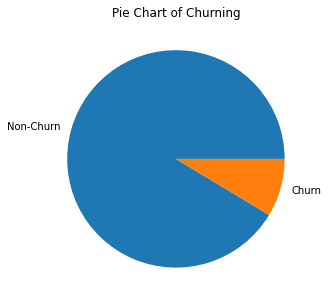

In [9]:
plt.figure(figsize=(10,5))
my_labels=["Non-Churn","Churn"]
plt.title("Pie Chart of Churning")
plt.pie(telecom['Churn'].value_counts(),labels=my_labels)
plt.show()

In [10]:
telecom.Churn.value_counts()

0    27390
1     2589
Name: Churn, dtype: int64

In [11]:
#Calculating Churn Percentage
print("The Churn Rate is:",len(telecom[telecom["Churn"]==1])/len(telecom.Churn)*100)

The Churn Rate is: 8.636045231662164


In [12]:
#As per analysis we need to remove all the attributes corresponding to the churn phase 
telecom=telecom.drop(["total_usage_col","total_rech_amt_good_phase"],1)
red_cols=[]
for i in telecom.columns:
    if "9" in i:
        red_cols.append(i)

In [13]:
#Dropping the columns that has 9 in it and checking the dataframe
telecom=telecom.drop(red_cols,1)
telecom.shape

(29979, 173)

**As we have filtered the hugh value customers, tagged the churners and removed the churn phase attributes accordingly, we see that the no of rows in the dataframe is about 29.9k.**

In [14]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn
count,2.997900e+04,29979.0,29865.0,29865.0,29865.0,29979.000000,29979.000000,29979.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.00000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.00000,29041.000000,29663.0,29676.0,29041.0,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29979.000000,29979.000000,29979.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.0,29676.0,29041.0,29663.000000,29676.000000,29041.000000,29979.000000,29979.000000,29979.000000,29663.000000,29676.000000,29041.00000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,11387.000000,11652.000000,11741.000000,11387.000000,11652.000000,11741.000000,11387.000000,11652.000000,11741.000000,11387.000000,11652.000000,11741.000000,11387.000000,11652.000000,11741.000000,29979.000000,29979

## Class Imbalance

In [15]:
#Handling Class Imbalance
red_cols=[]
for col in telecom.columns:
    if (telecom[col].nunique()==1):
        red_cols.append(col)

In [16]:
red_cols

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

**Inerences Drawn:**
1. We see that these columns have only 1  unique value. Hence this creates class imbalance. Hence we will drop these columns.
2. In this list, we have the columns for which forecast needs to be done. Hence we will exclude these columns which has 9 in it.

In [17]:
#Removing the class imabalance columns
telecom=telecom.drop(red_cols,1)

In [18]:
#Checking the shape of the dataframe
telecom.shape

(29979, 160)

### Missing Value Treatment

In [19]:
total = telecom.isnull().sum().sort_values(ascending=False)
percentage = ((telecom.isnull().sum()/telecom.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percentage], 1, keys=['Total', 'Percentage'])
missing_data.head(100)

,Total,Percentage
av_rech_amt_data_6,18592,62.016745
count_rech_3g_6,18592,62.016745
arpu_3g_6,18592,62.016745
arpu_2g_6,18592,62.016745
max_rech_data_6,18592,62.016745
night_pck_user_6,18592,62.016745
count_rech_2g_6,18592,62.016745
date_of_last_rech_data_6,18592,62.016745
total_rech_data_6,18592,62.016745
fb_user_6,18592,62.016745


In [20]:
telecom.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,NaN,7/31/2014,8/23/2014,NaN,2.0,3.0,NaN,154.0,23.0,NaN,2.0,3.0,NaN,0.0,0.0,NaN,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,NaN,0.0,19.83,NaN,0.0,0.0,NaN,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,NaN,1.0,1.0,315,21.03,910.65,122.16,0.0,0
13,70

**We see that there are a lot of columns with missing data. These contains date columns as well. Hence imputation needs to be done differently for them.**

In [21]:
#Dropping columns having more than 70% missing data since they have very small amount of missing value %
missing_col=["av_rech_amt_data","count_rech_3g","arpu_3g","arpu_2g","max_rech_data","night_pck_user",
             "count_rech_2g","date_of_last_rech_data","total_rech_data","fb_user"]
for col in missing_col:
    for month in ["6","7","8"]:
        missing_col=col+ "_" + month
        telecom=telecom.drop(missing_col,1)
print(telecom.shape)

(29979, 130)


In [22]:
#Dropping the september column from the dataset
telecom=telecom.drop("sep_vbc_3g",1)

In [23]:
telecom.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,6/20/2014,7/22/2014,8/30/2014,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,7

In [24]:
#Imputing the date column with the mode of the column since 
col=["date_of_last_rech"]
for i in col:
    for month in ["6","7","8"]:
        col=i+ "_" +month
        telecom[col].fillna(telecom[col].mode()[0],inplace=True)

In [25]:
telecom["date_of_last_rech_6"].head()

7     6/27/2014
8     6/25/2014
13    6/20/2014
16    6/30/2014
17    6/30/2014
Name: date_of_last_rech_6, dtype: object

**Since we know that these columns are of the same year and the month is given in the column name, we would not need the full date in the column. Hence we will only show the day.**

In [26]:
#Converting the dates column into days which is basically int column
telecom['date_of_last_rech_6'] = pd.to_datetime(telecom.date_of_last_rech_6).dt.day
telecom['date_of_last_rech_7'] = pd.to_datetime(telecom.date_of_last_rech_7).dt.day
telecom['date_of_last_rech_8'] = pd.to_datetime(telecom.date_of_last_rech_8).dt.day

In [27]:
telecom["date_of_last_rech_6"].head()

7     27
8     25
13    20
16    30
17    30
Name: date_of_last_rech_6, dtype: int64

In [28]:
# Imputing other missing values with their median value of the respective column
missing_cols=telecom.columns[telecom.isnull().sum()>0]
for col in missing_cols:
    telecom[col]=telecom[col].fillna(telecom[col].median())

In [29]:
#Checking again for missing values
total = telecom.isnull().sum().sort_values(ascending=False)
percentage = ((telecom.isnull().sum()/telecom.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percentage], 1, keys=['Total', 'Percentage'])
missing_data.head(100)

,Total,Percentage
mobile_number,0,0.0
loc_ic_mou_7,0,0.0
total_rech_amt_7,0,0.0
total_rech_amt_6,0,0.0
total_rech_num_8,0,0.0
total_rech_num_7,0,0.0
total_rech_num_6,0,0.0
ic_others_8,0,0.0
ic_others_7,0,0.0
ic_others_6,0,0.0


**Hence there are no missing values.**

## Outlier Treatment

In [30]:
telecom.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Churn
count,2.997900e+04,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,7.001223e+09,587.587624,589.424681,535.067748,297.590611,305.886840,271.137938,421.142281,426.990330,383.029940,17.428073,13.535270,13.263074,29.348362,22.056425,21.483542,95.084989,96.129949,88.149189,182.428031,182.396339,170.618259,6.983204,7.104696,6.505787,1.567723,1.86379,1.714052,284.845600,285.973285,266.230021,190.036338,200.206205,172.600535,203.627289,213.913436,180.518823,2.012068,2.035893,1.790935,396.504945,417.016438,356.472052,2.266842

**As we can see that the data contains outliers.**

**We can see that after removing the top 1% and the last 1% values leads to huge loss of data hence we will cap these values to the 1 percentile or the 99 percentile values accordingly .**

In [31]:
for col in telecom.columns:
    if col not in ["mobile_number","Churn"]:
        upper=telecom[col].quantile(0.99)
        lower=telecom[col].quantile(0.01)
        telecom[col][telecom[col]<=lower]=lower
        telecom[col][telecom[col]>=upper]=upper

In [32]:
telecom.shape

(29979, 129)

# Exploratory Data Analysis

## Univariate Analysis

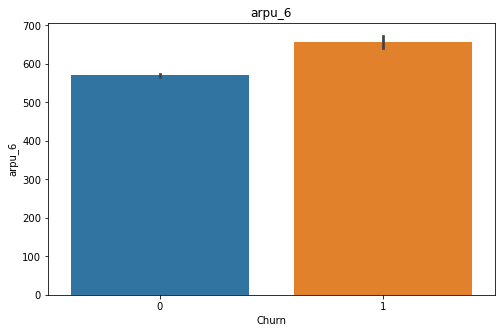

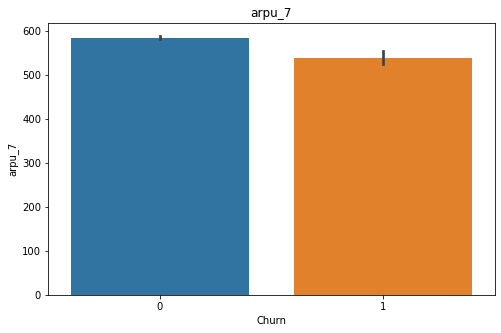

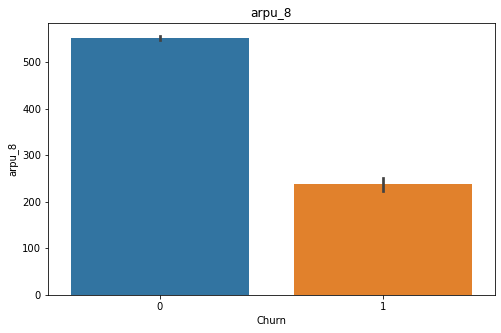

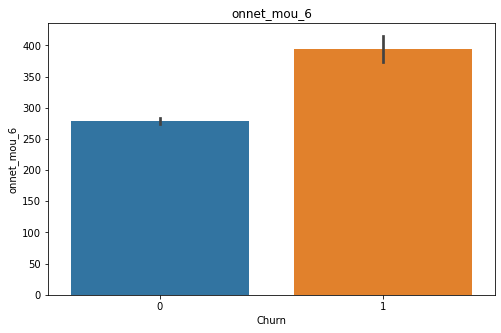

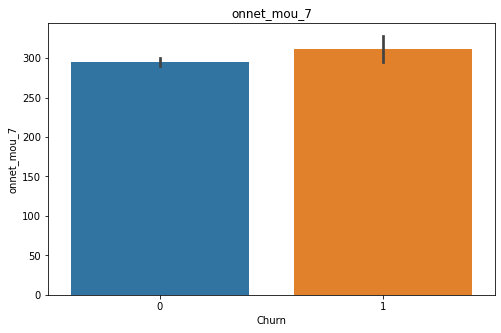

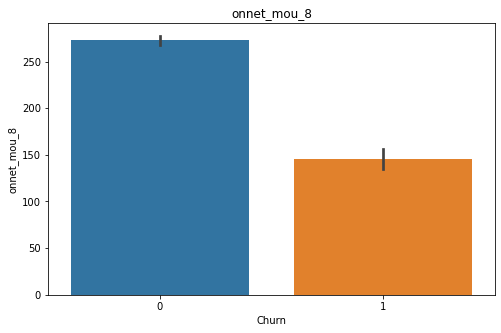

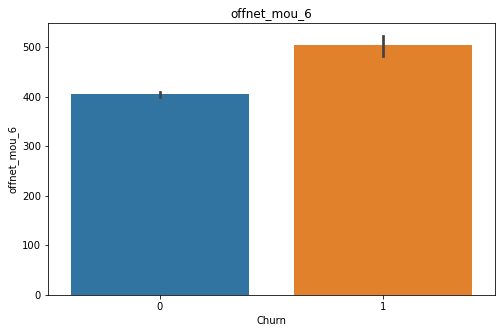

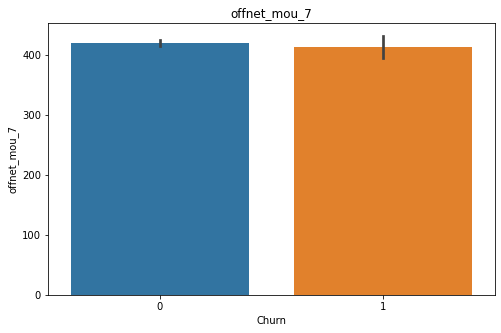

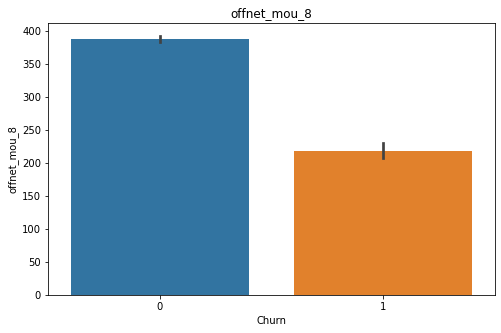

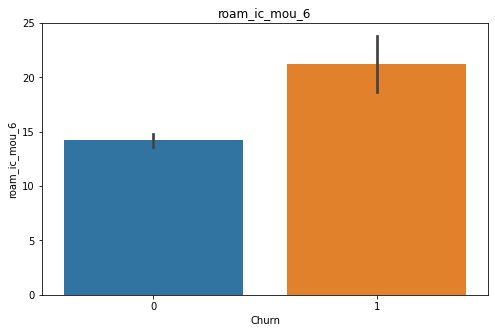

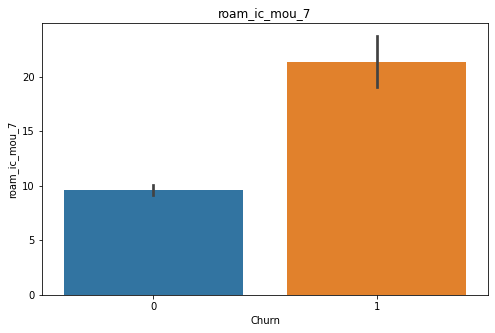

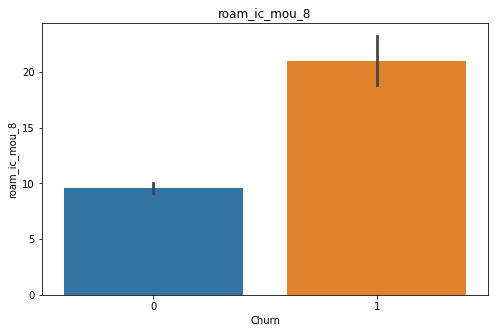

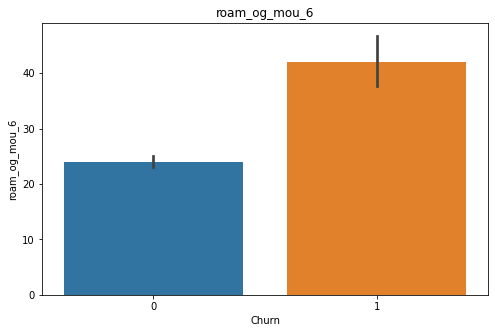

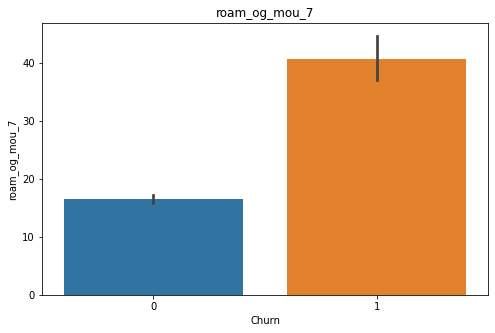

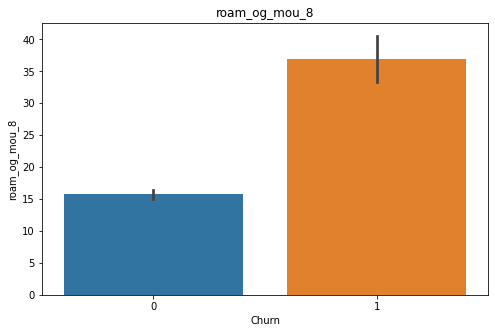

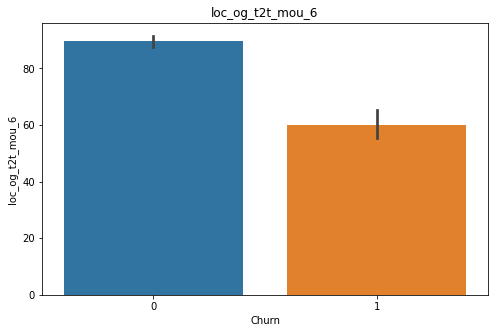

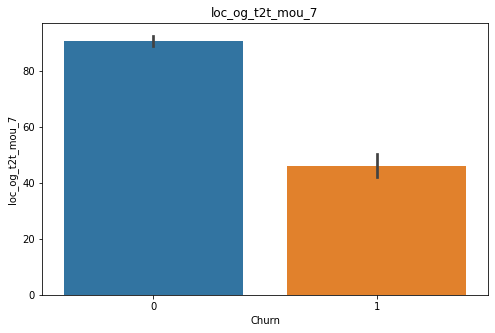

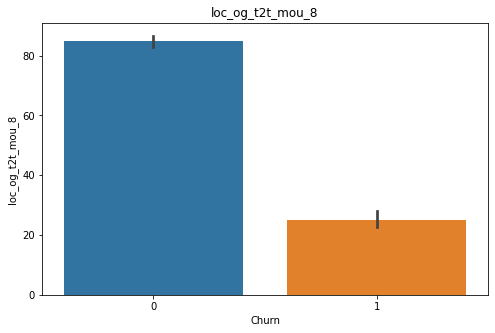

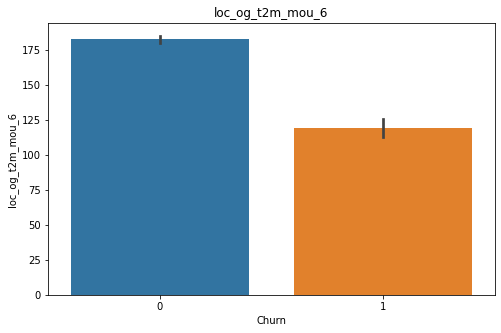

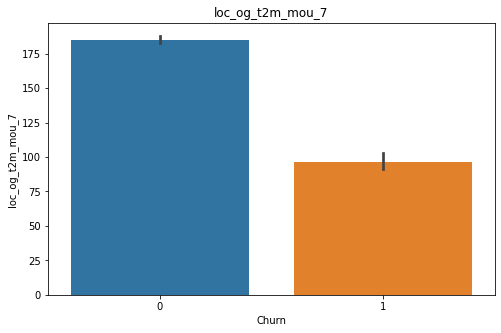

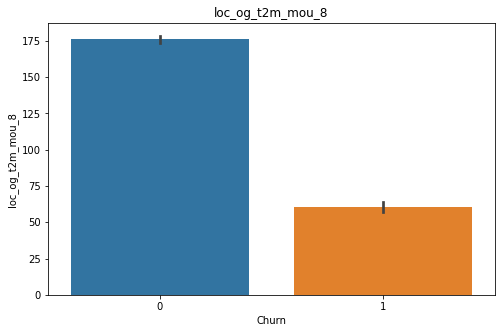

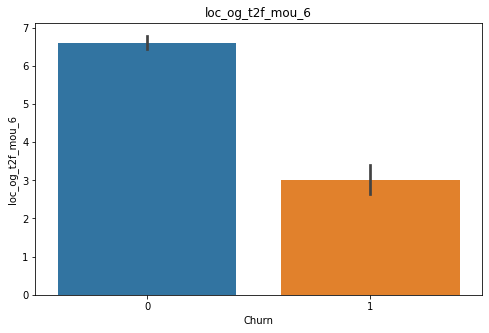

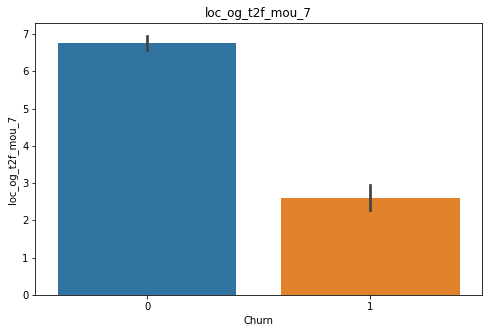

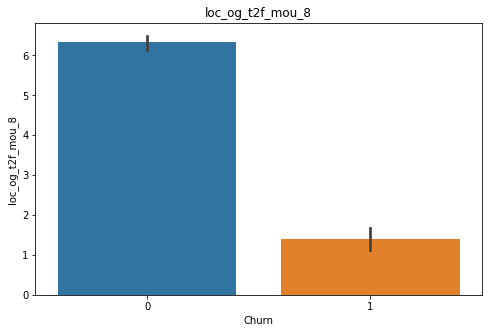

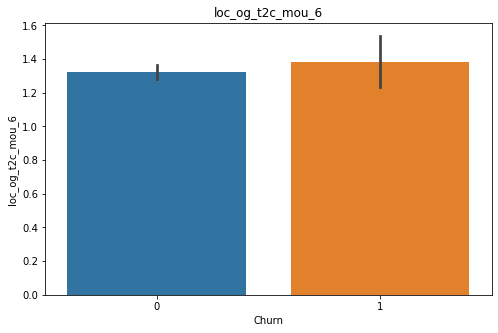

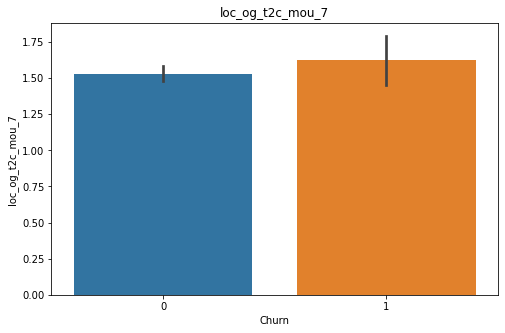

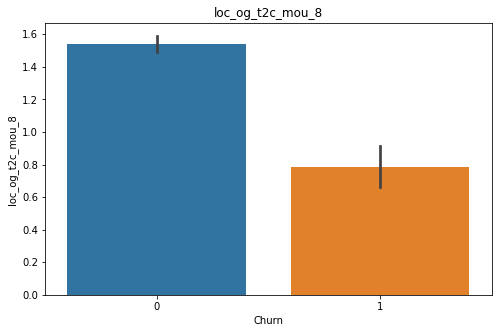

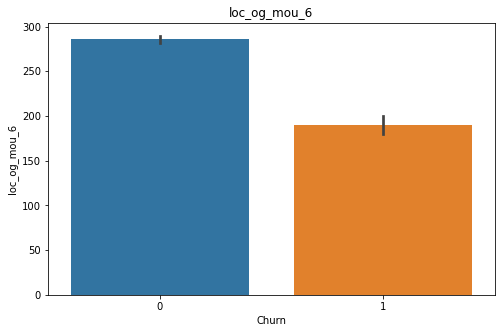

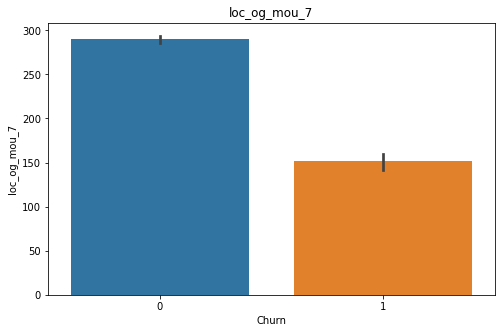

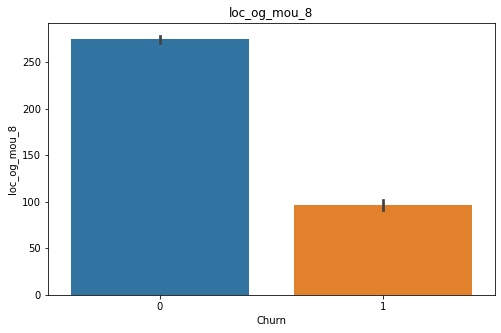

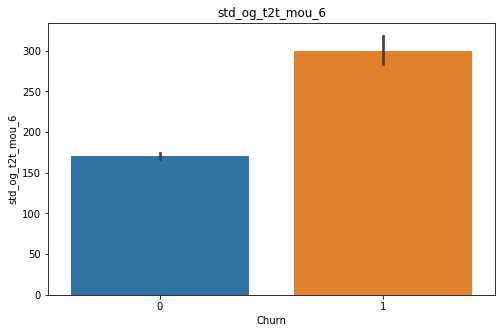

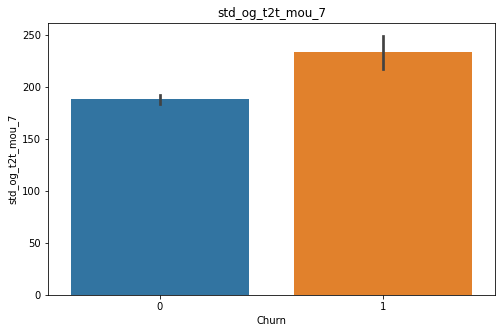

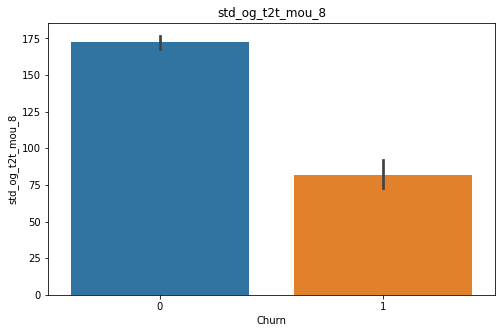

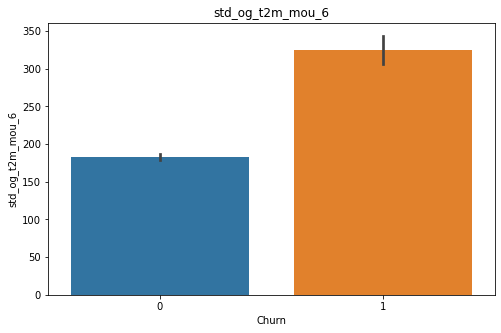

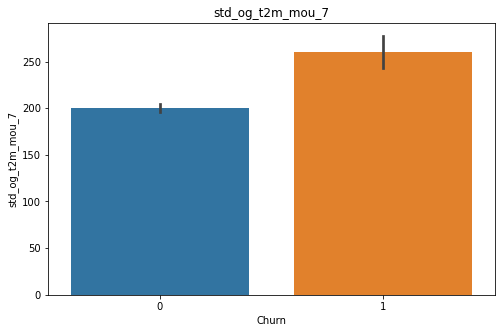

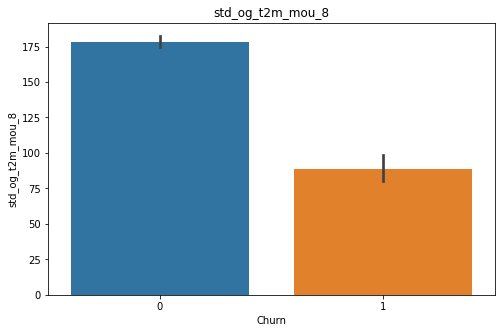

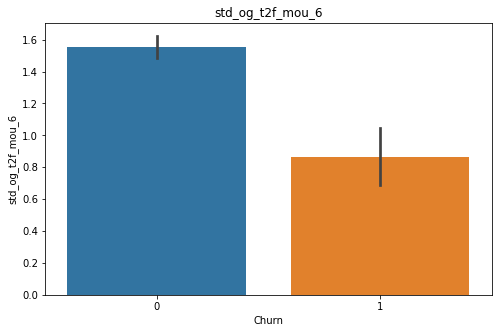

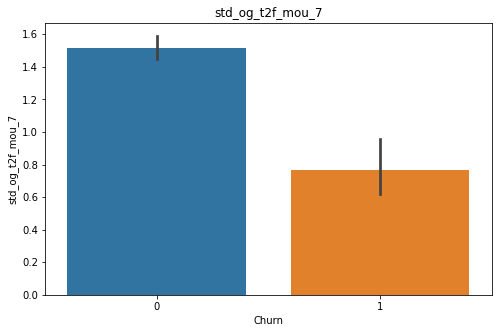

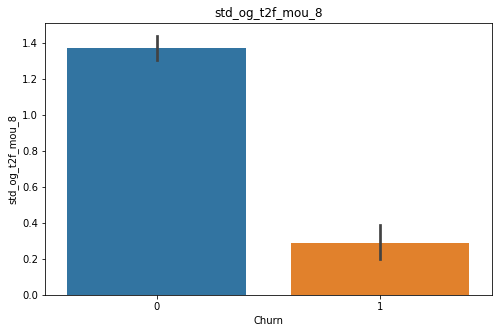

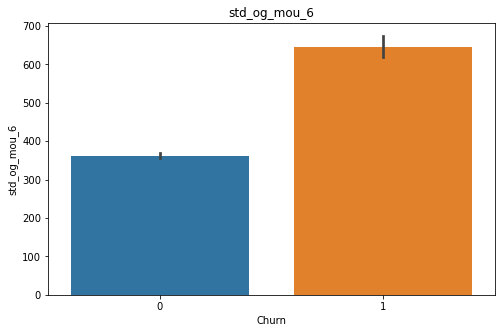

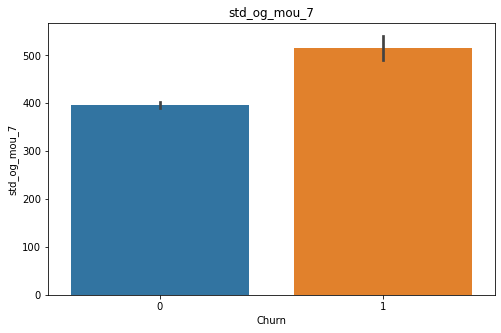

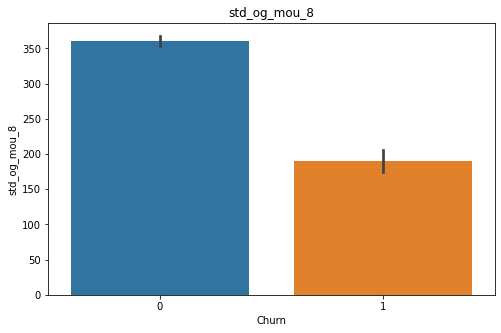

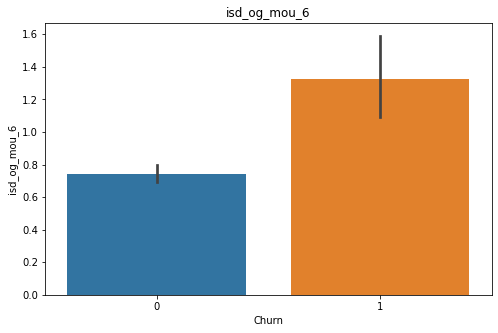

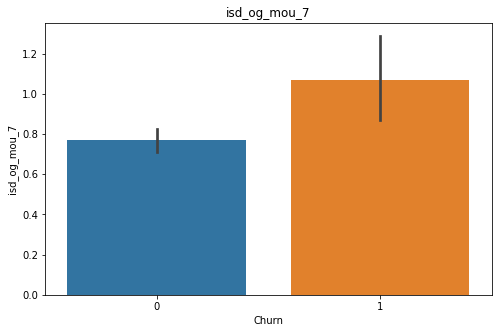

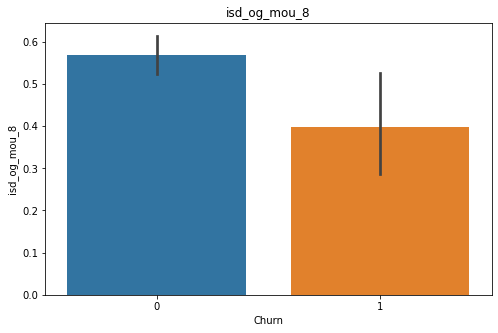

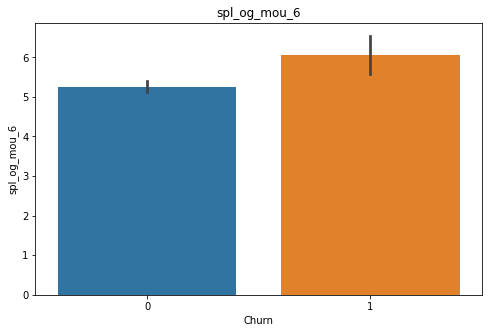

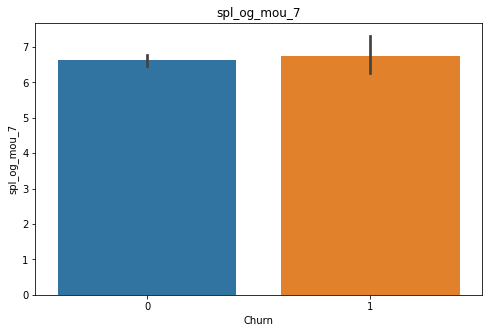

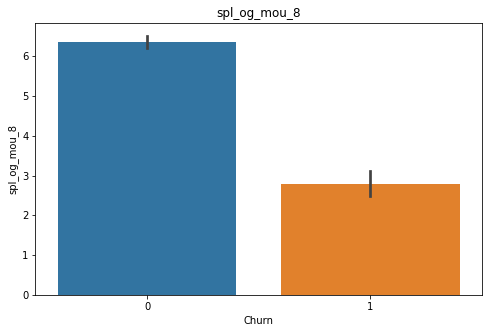

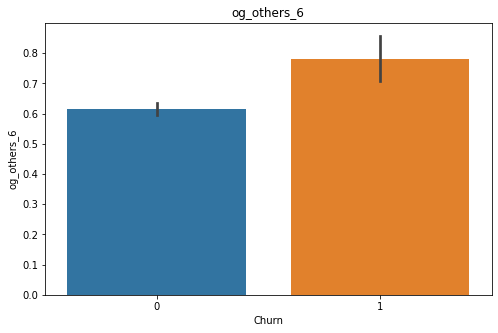

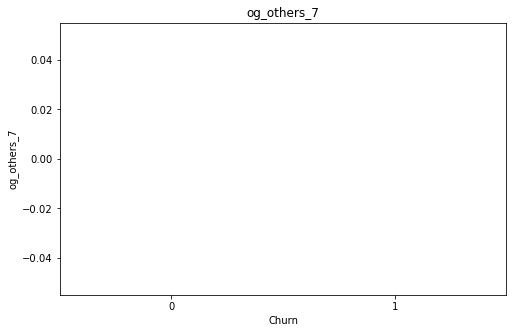

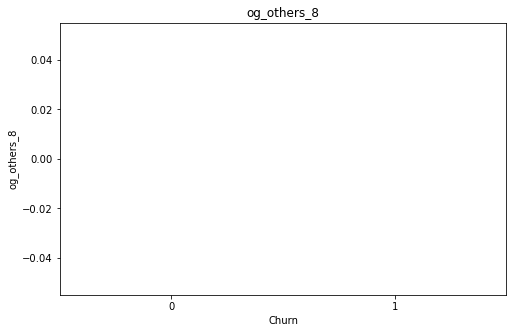

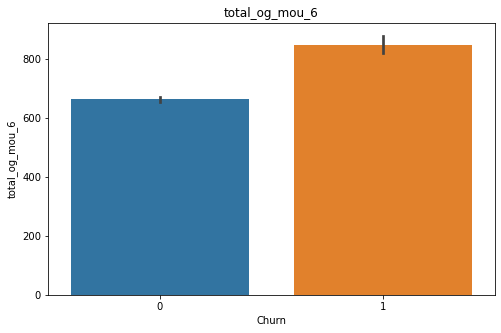

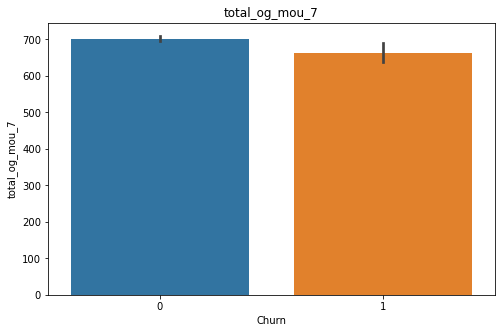

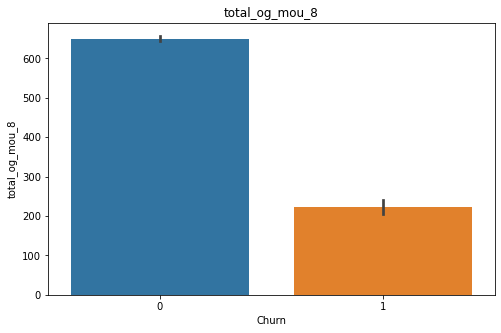

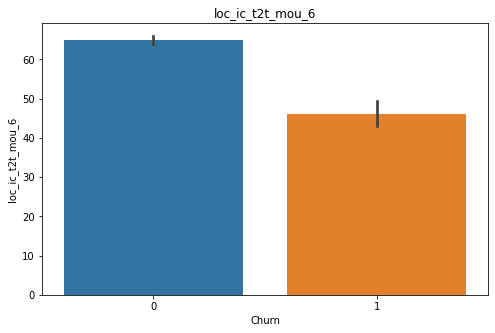

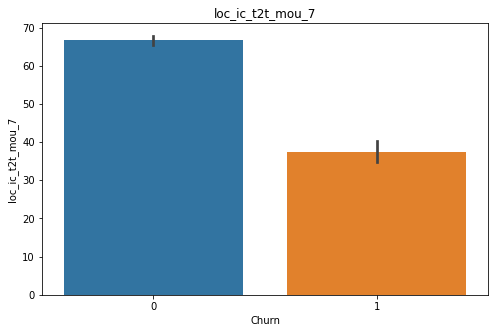

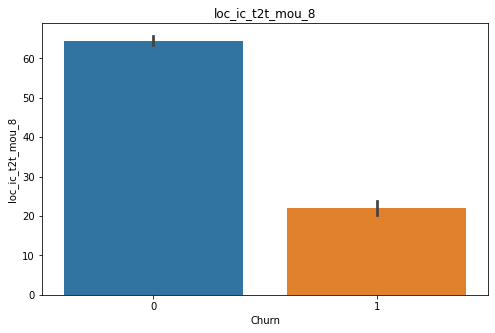

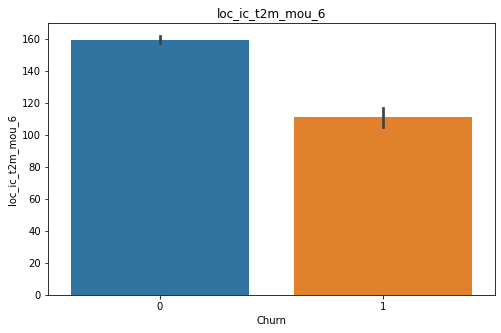

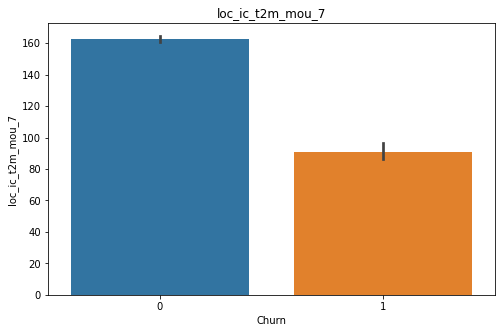

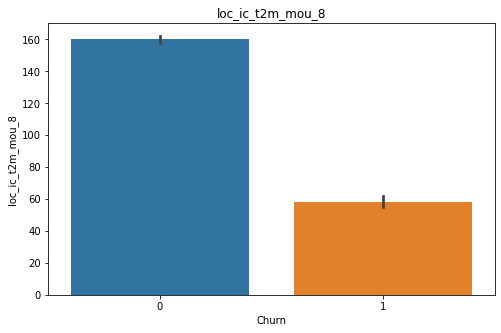

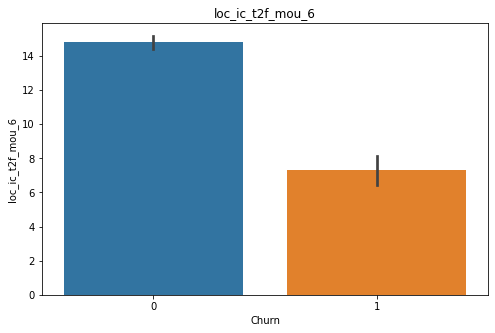

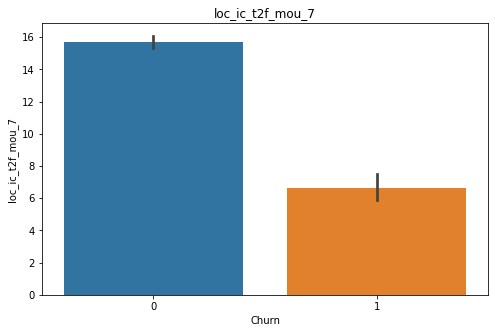

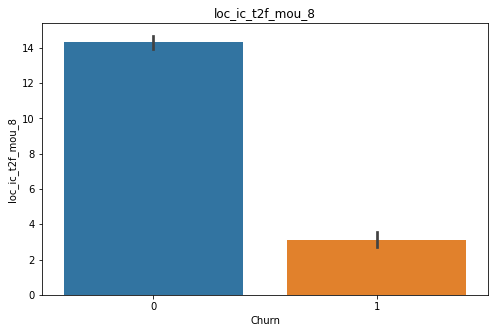

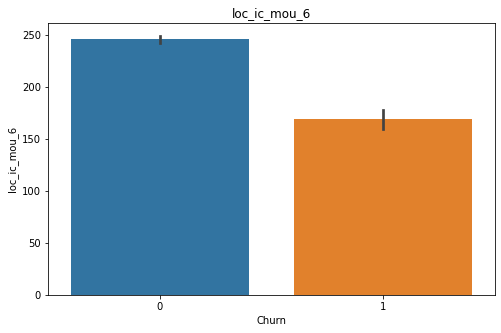

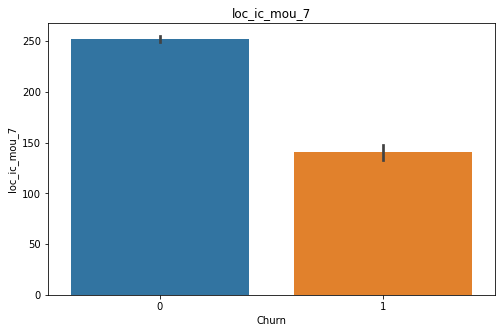

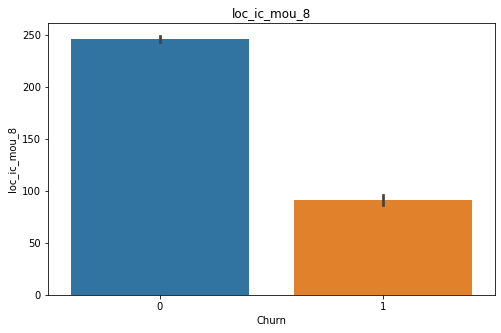

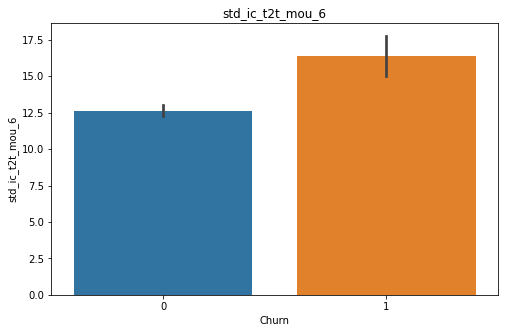

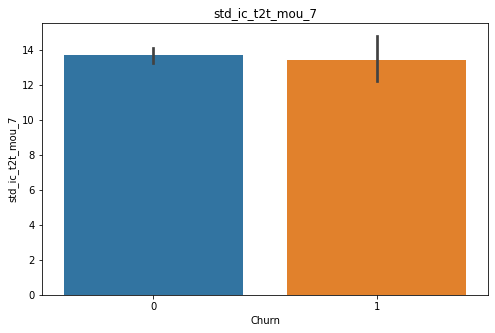

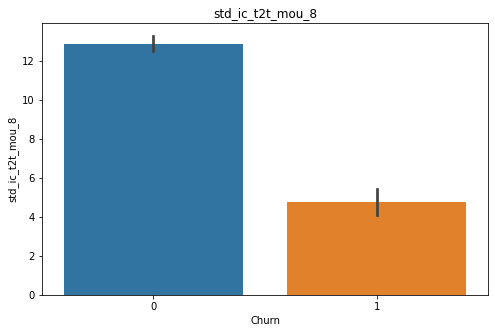

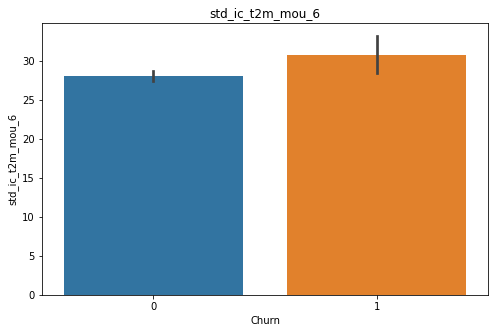

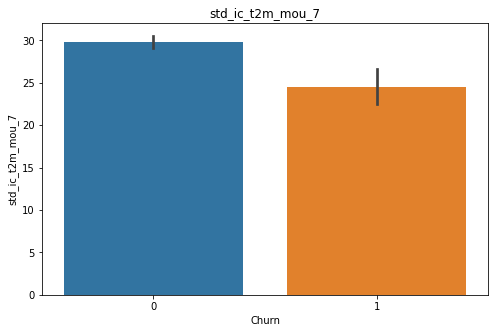

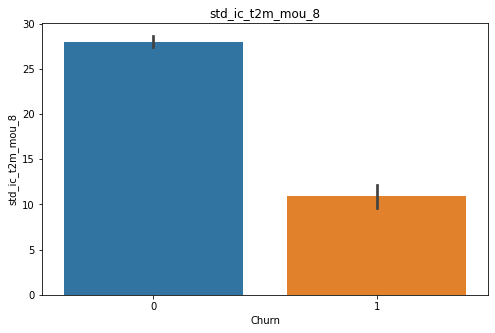

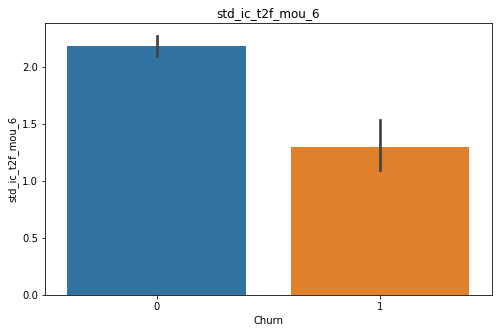

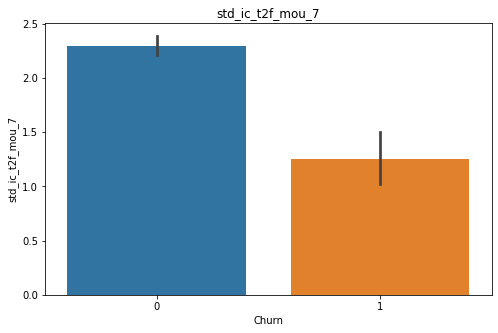

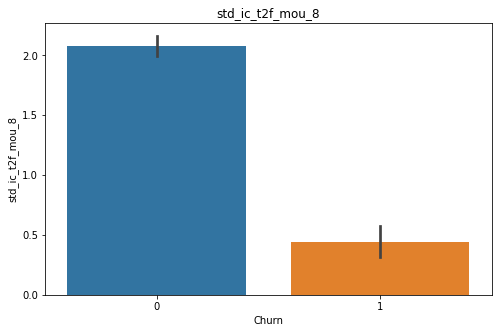

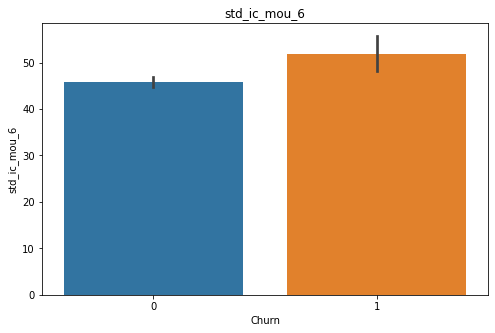

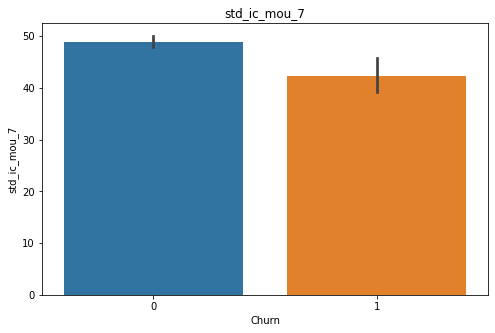

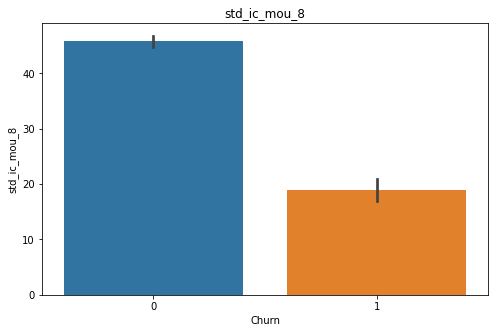

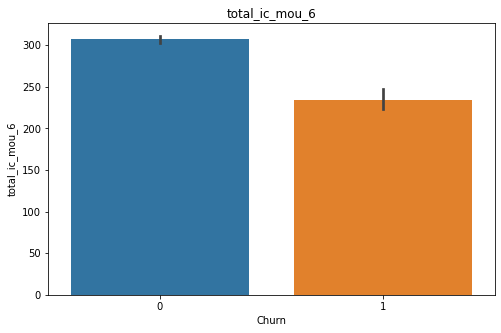

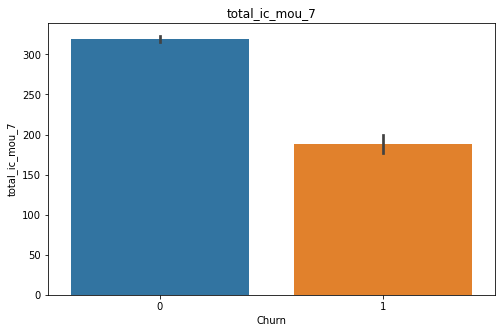

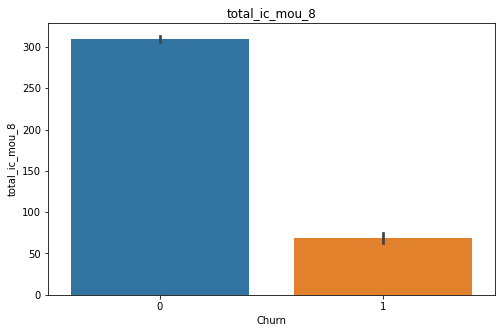

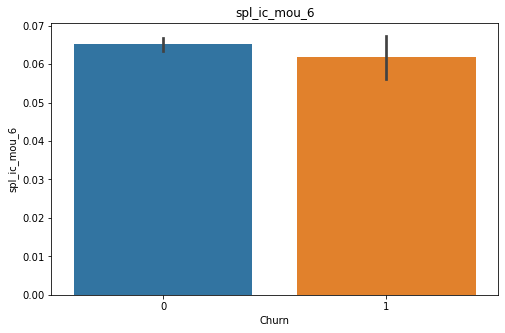

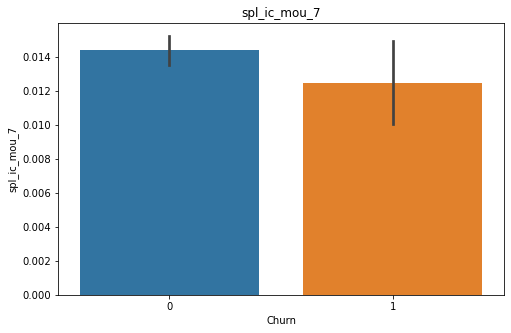

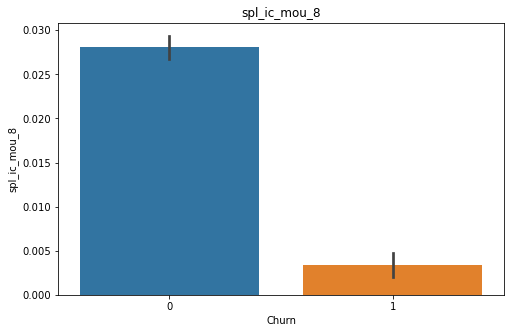

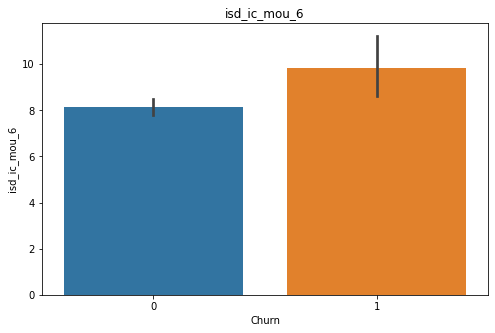

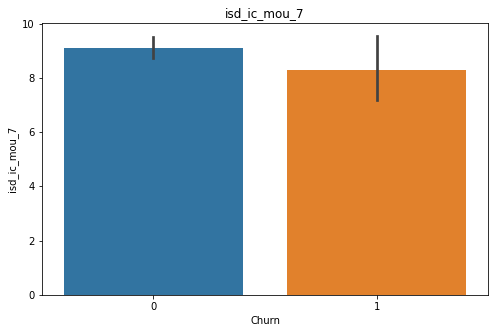

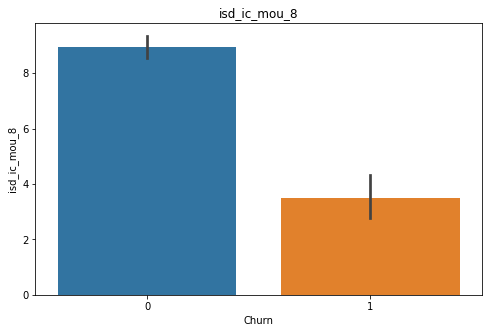

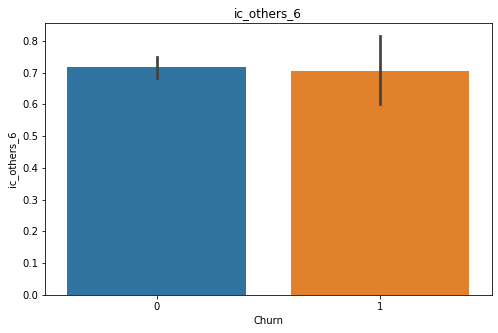

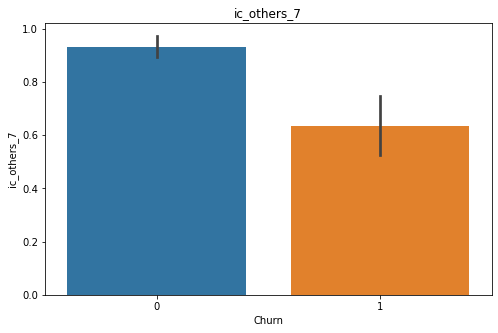

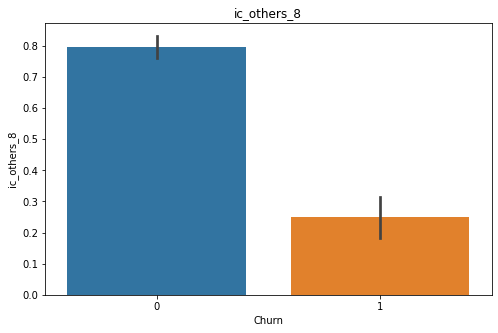

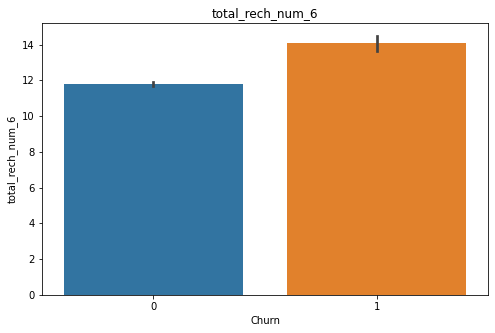

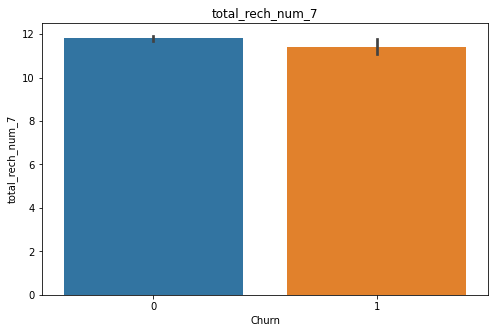

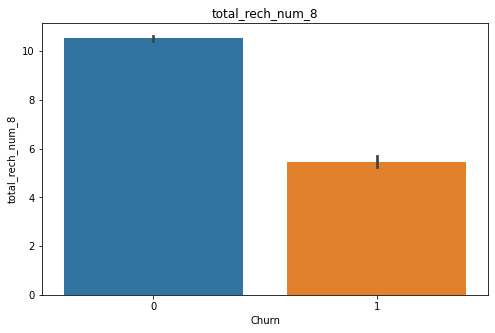

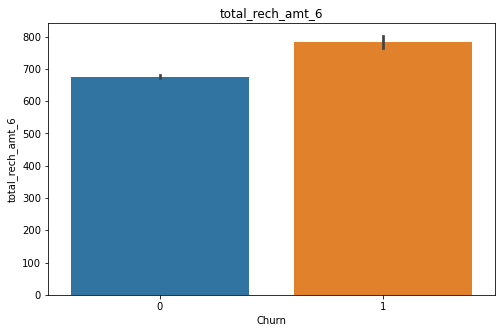

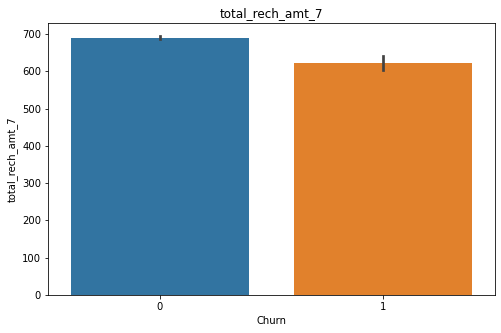

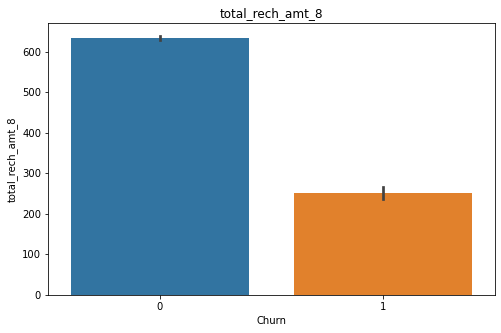

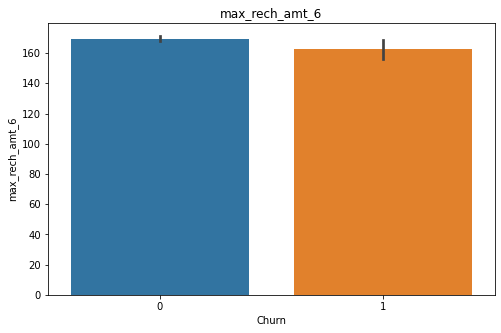

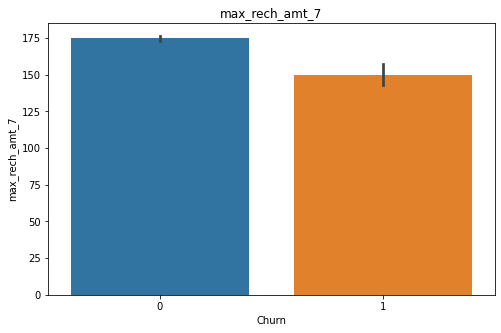

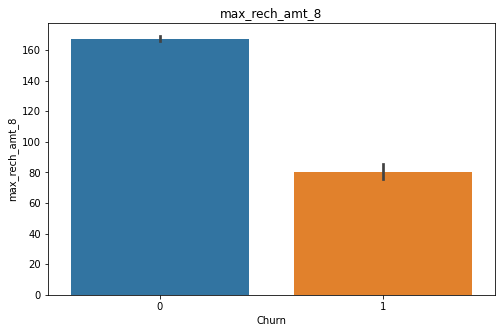

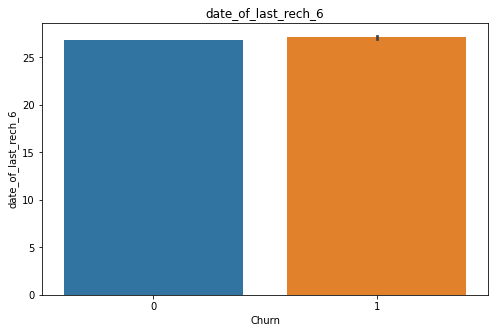

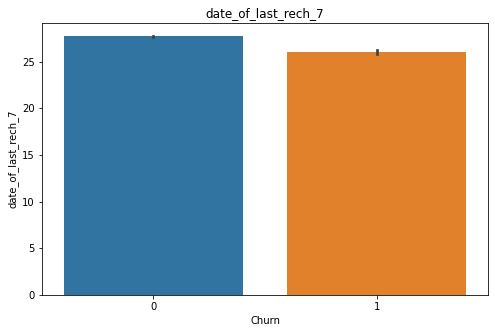

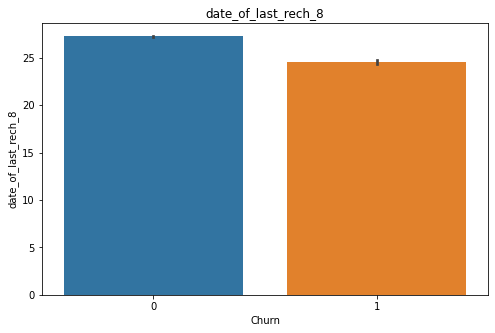

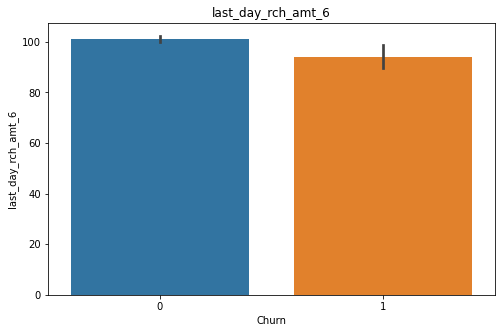

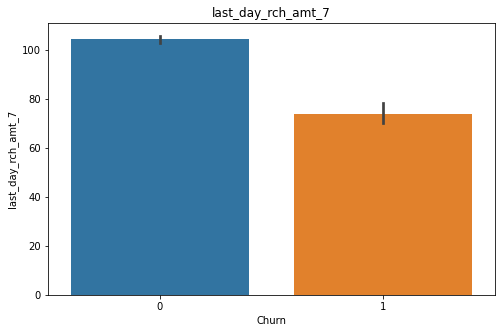

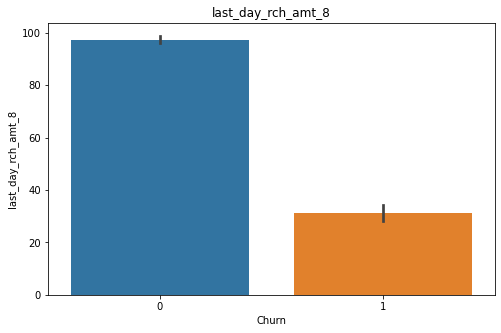

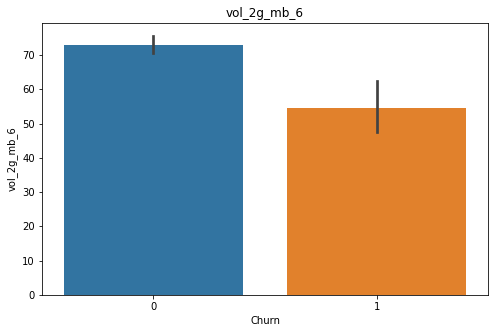

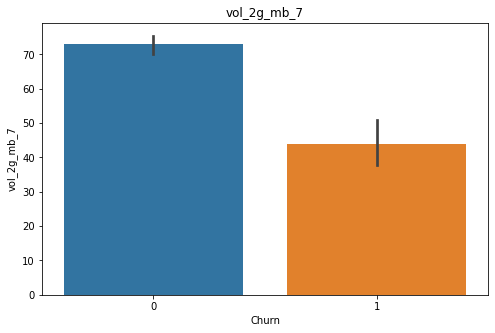

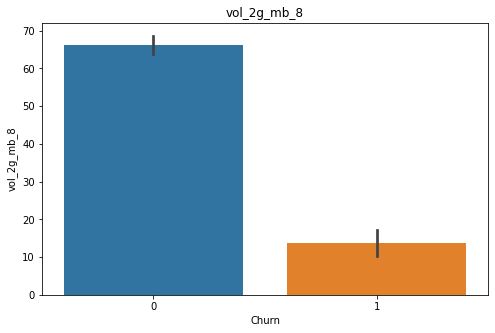

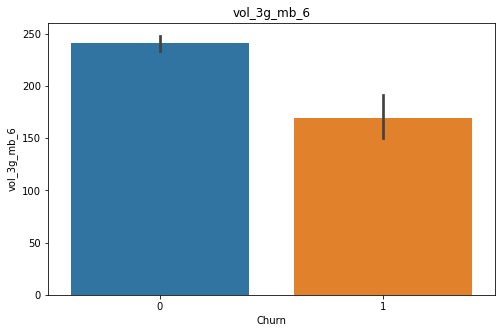

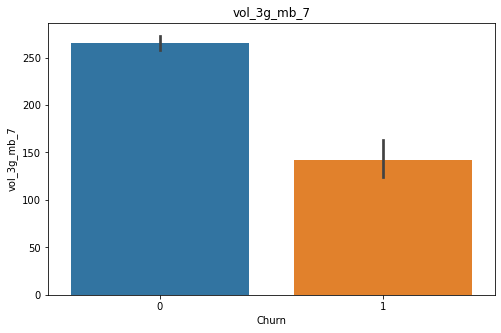

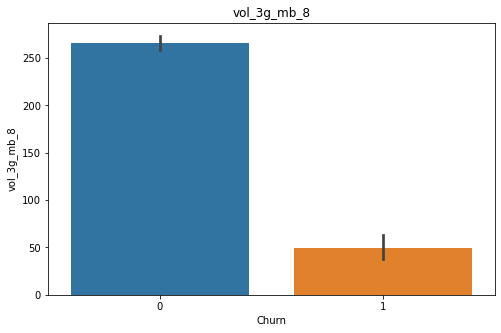

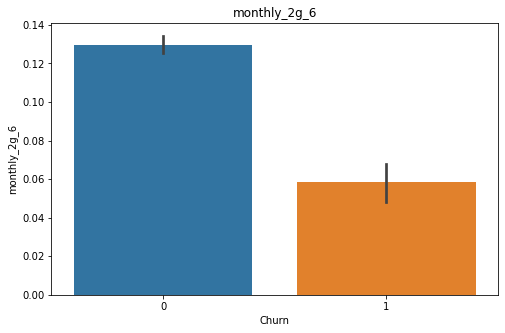

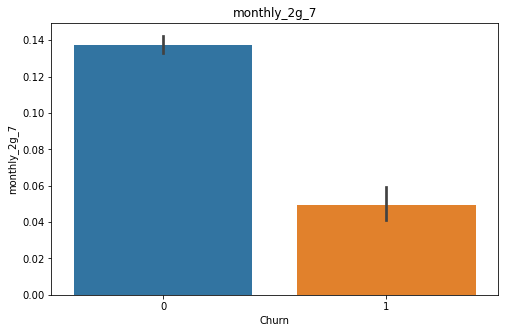

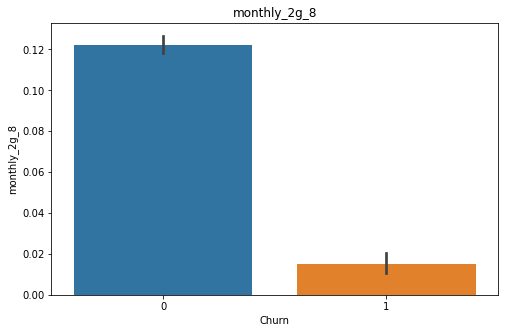

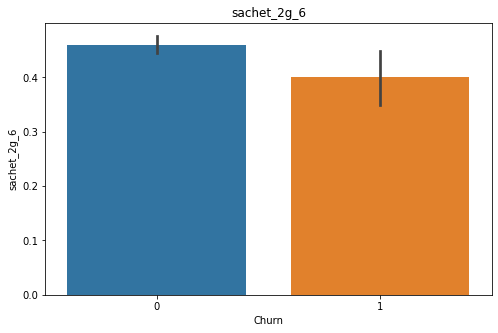

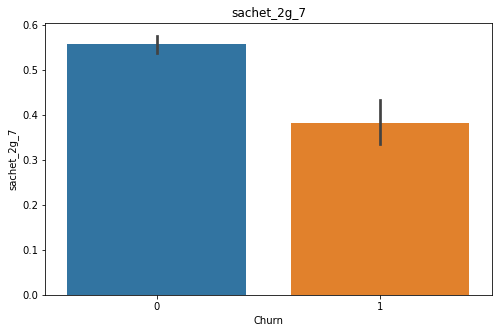

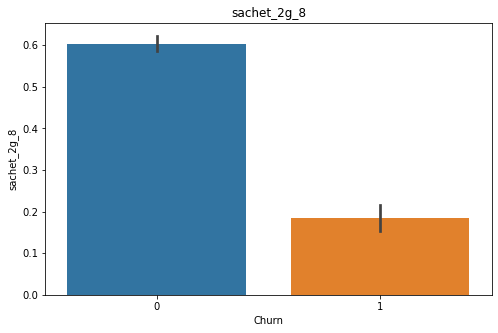

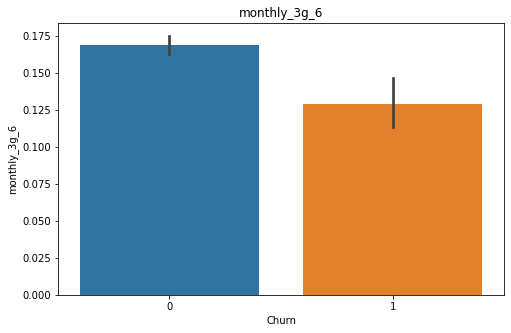

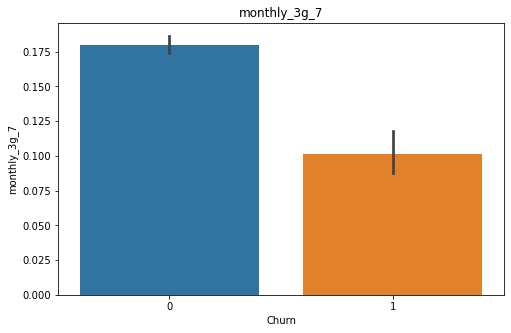

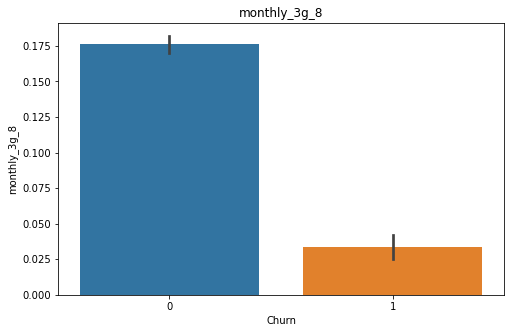

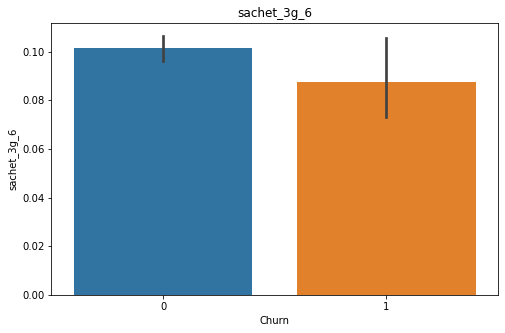

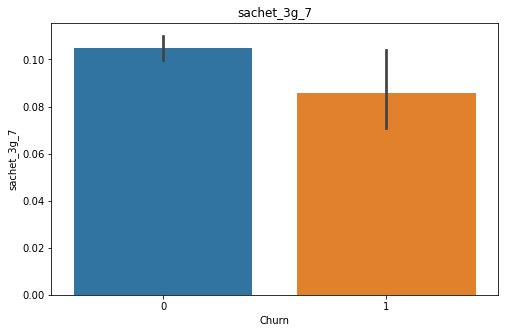

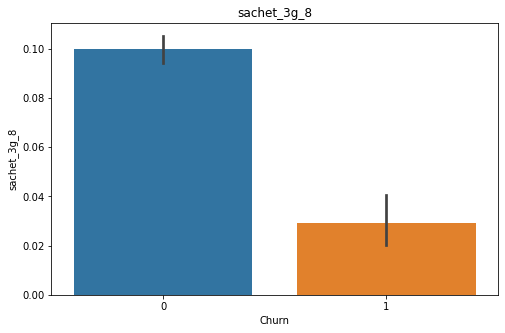

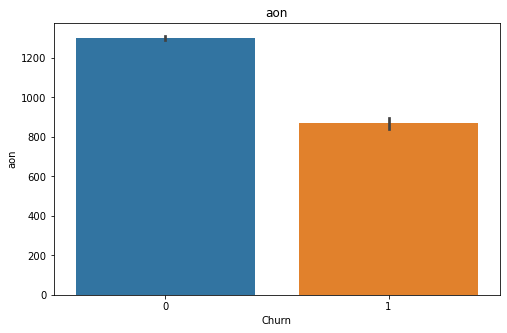

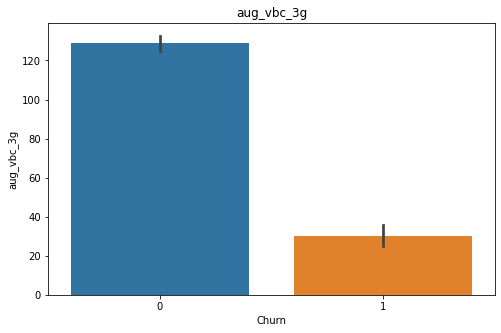

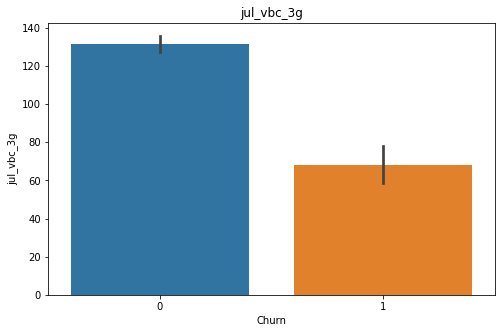

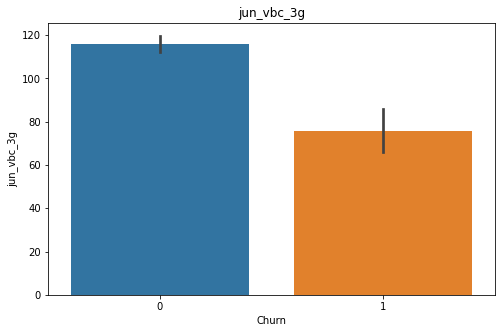

In [33]:
#plotting the bar charts for all the columns
for col in telecom.columns:
    if col not in ["mobile_number","Churn"]:
        plt.figure(figsize=(8,5))
        sns.barplot(data=telecom, x="Churn",y=col)
        plt.title(col)

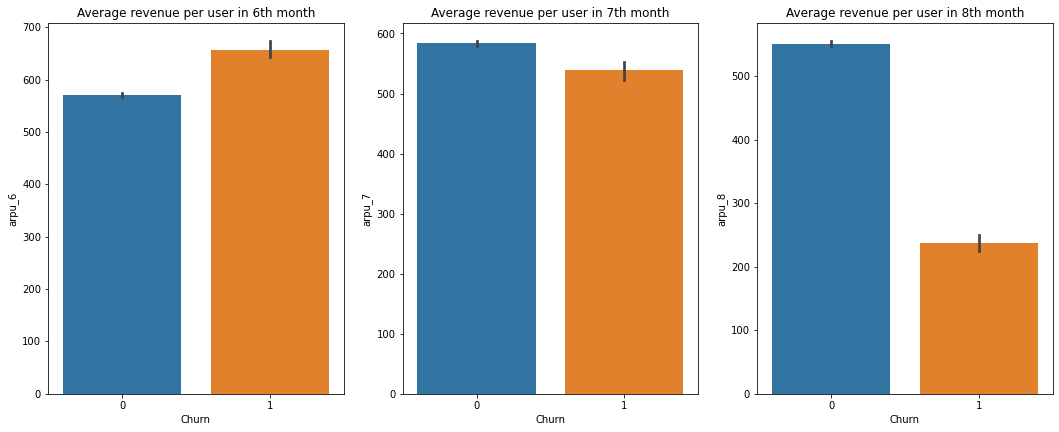

In [34]:
plt.figure(figsize=(18, 15))
plt.subplot(2,3,1)
sns.barplot(x = 'Churn', y = 'arpu_6', data = telecom)
plt.title("Average revenue per user in 6th month")
plt.subplot(2,3,2)
plt.ylabel('Av Rev. Month 7')
sns.barplot(x = 'Churn', y = 'arpu_7', data = telecom)
plt.title("Average revenue per user in 7th month")
plt.subplot(2,3,3)
plt.ylabel('Av Rev. Month 8')
sns.barplot(x = 'Churn', y = 'arpu_8', data = telecom)
plt.title("Average revenue per user in 8th month")
plt.show()

**Inferences Drawn:**
1. We see that during the 8th month, there are a big drop of average revenue for churn users. This means that the customers churned later.
2. In the 6 th month. the churn customers had high average revenue which dropped in the next month and then signficantly dropped in the final month i.e. the 8th month

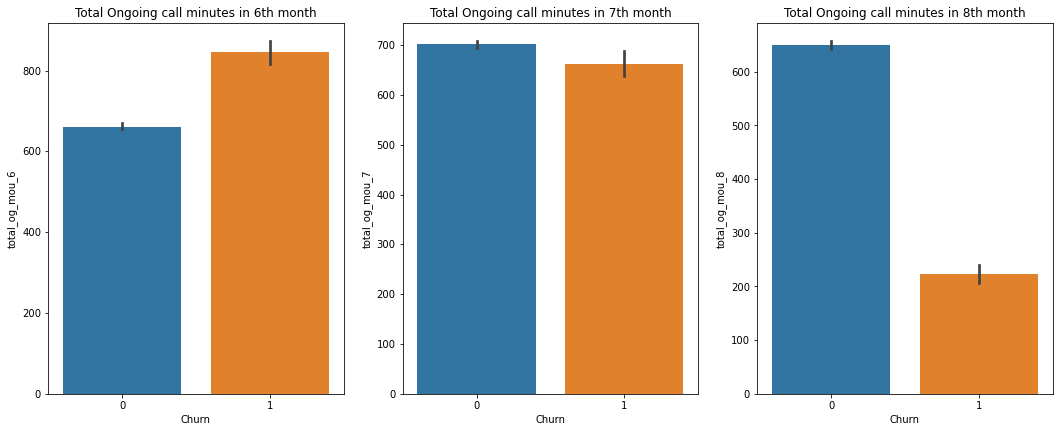

In [35]:
plt.figure(figsize=(18,15))
plt.subplot(2,3,1)
sns.barplot(x = 'Churn', y = 'total_og_mou_6', data = telecom)
plt.title("Total Ongoing call minutes in 6th month")
plt.subplot(2,3,2)
sns.barplot(x = 'Churn', y = 'total_og_mou_7', data = telecom)
plt.title("Total Ongoing call minutes in 7th month")
plt.subplot(2,3,3)
sns.barplot(x = 'Churn', y = 'total_og_mou_8', data = telecom)
plt.title("Total Ongoing call minutes in 8th month")
plt.show()

**Inferences Drawn:**
1. Again we see that during the 8th month, the number of churn users have significantly decreased number of outgoing calls minutes than the other months.
2. The churn customers have actively used the service during the 6th and the 7th month.

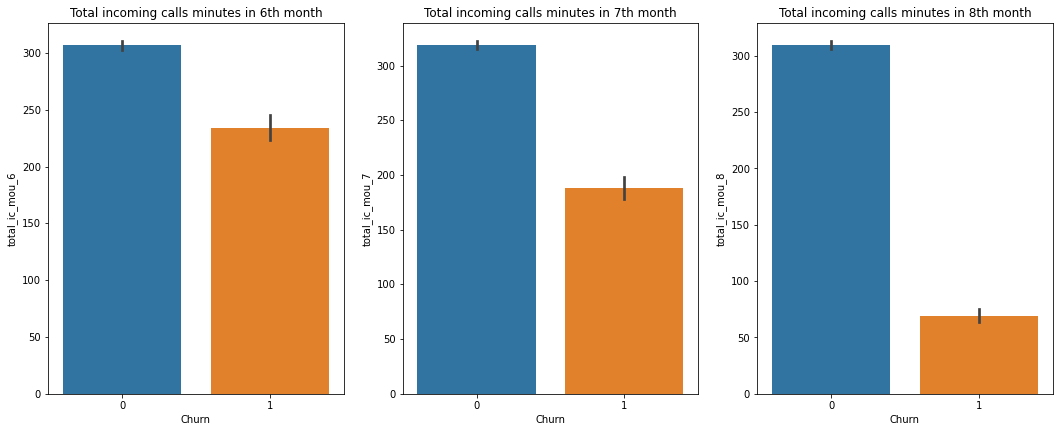

In [36]:
plt.figure(figsize=(18,15))
plt.subplot(2,3,1)
sns.barplot(x = 'Churn', y = 'total_ic_mou_6', data = telecom)
plt.title("Total incoming calls minutes in 6th month")
plt.subplot(2,3,2)
sns.barplot(x = 'Churn', y = 'total_ic_mou_7', data = telecom)
plt.title("Total incoming calls minutes in 7th month")
plt.subplot(2,3,3)
sns.barplot(x = 'Churn', y = 'total_ic_mou_8', data = telecom)
plt.title("Total incoming calls minutes in 8th month")
plt.show()

**Inferences Drawn:**
1. The amount of incoming calls usage to churn users have been reducing since 6th month and has reduced drastically in the 8th month.

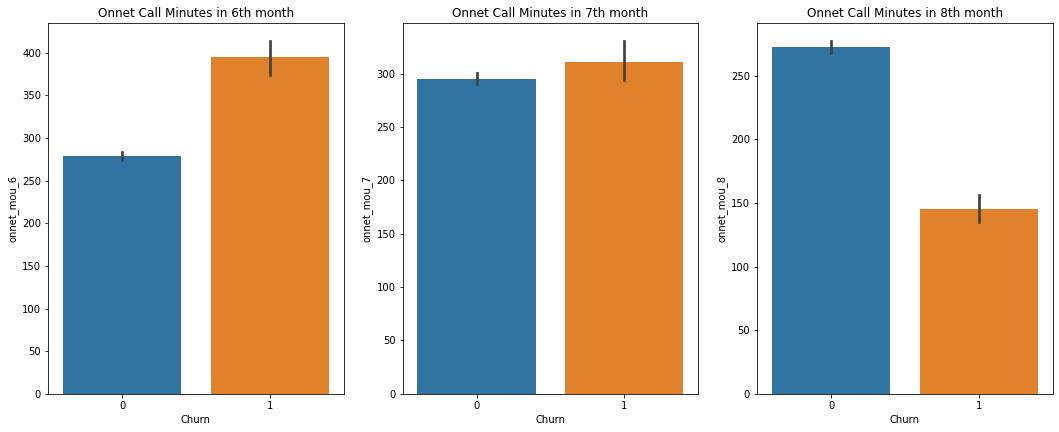

In [37]:
plt.figure(figsize=(18,15))
plt.subplot(2,3,1)
sns.barplot(x = 'Churn', y = 'onnet_mou_6', data = telecom)
plt.title("Onnet Call Minutes in 6th month")
plt.subplot(2,3,2)
sns.barplot(x = 'Churn', y = 'onnet_mou_7', data = telecom)
plt.title("Onnet Call Minutes in 7th month")
plt.subplot(2,3,3)
sns.barplot(x = 'Churn', y = 'onnet_mou_8', data = telecom)
plt.title("Onnet Call Minutes in 8th month")
plt.show()

**Inferences Drawn:**
1. The amount of onnet call usage has been drastically reduced in the 8th month for the churn users.

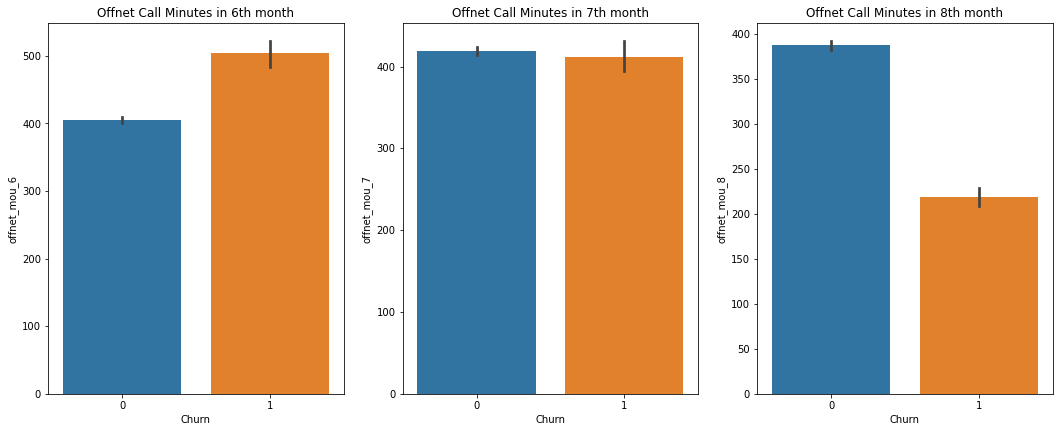

In [38]:
plt.figure(figsize=(18,15))
plt.subplot(2,3,1)
sns.barplot(x = 'Churn', y = 'offnet_mou_6', data = telecom)
plt.title("Offnet Call Minutes in 6th month")
plt.subplot(2,3,2)
sns.barplot(x = 'Churn', y = 'offnet_mou_7', data = telecom)
plt.title("Offnet Call Minutes in 7th month")
plt.subplot(2,3,3)
sns.barplot(x = 'Churn', y = 'offnet_mou_8', data = telecom)
plt.title("Offnet Call Minutes in 8th month")
plt.show()

**Inferences Drawn:**
1. The amount of offnet call usage has been drastically reduced in the 8th month for the churn users.

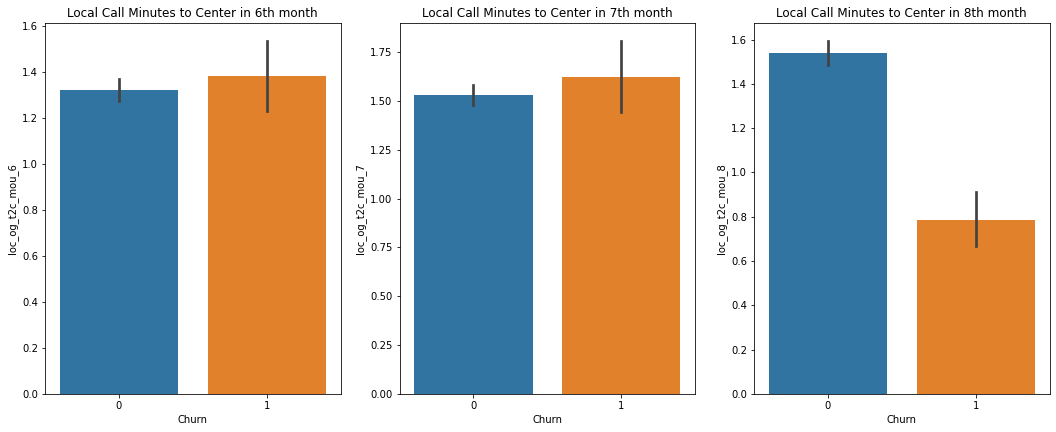

In [39]:
plt.figure(figsize=(18,15))
plt.subplot(2,3,1)
sns.barplot(x = 'Churn', y = 'loc_og_t2c_mou_6', data = telecom)
plt.title("Local Call Minutes to Center in 6th month")
plt.subplot(2,3,2)
sns.barplot(x = 'Churn', y = 'loc_og_t2c_mou_7', data = telecom)
plt.title("Local Call Minutes to Center in 7th month")
plt.subplot(2,3,3)
sns.barplot(x = 'Churn', y = 'loc_og_t2c_mou_8', data = telecom)
plt.title("Local Call Minutes to Center in 8th month")
plt.show()

**Inferences Drawn:**
1. The local call minutes to the call centre is high in 6th and 7th month.

**Since there are multiple definitions like Total, Usage minutes, amount, Offnet and onnet, 2g and 3g data pack, we will extract them and visualise them seperately.**

In [40]:
telecom_recharge=telecom.loc[:,telecom.columns.str.contains("rech")]
telecom_amount=telecom.loc[:,telecom.columns.str.contains("amt")]
telecom_total=telecom.loc[:,telecom.columns.str.contains("tot")]
telecom_og_mou=telecom.loc[:,(telecom.columns.str.contains("og")) & 
                           (telecom.columns.str.contains("mou"))]
telecom_ic_mou=telecom.loc[:,(telecom.columns.str.contains("ic")) & 
                           (telecom.columns.str.contains("mou"))]
telecom_net=telecom.loc[:,telecom.columns.str.contains("net_mou")]
data_3g=telecom.loc[:,telecom.columns.str.contains("3g")]
data_2g=telecom.loc[:,telecom.columns.str.contains("2g")]

In [41]:
print(telecom_recharge.shape)
print(telecom_amount.shape)
print(telecom_total.shape)
print(telecom_og_mou.shape)
print(telecom_ic_mou.shape)
print(telecom_net.shape)
print(data_3g.shape)
print(data_2g.shape)

(29979, 12)
(29979, 9)
(29979, 12)
(29979, 39)
(29979, 36)
(29979, 6)
(29979, 12)
(29979, 9)


## Multivariate Analysis

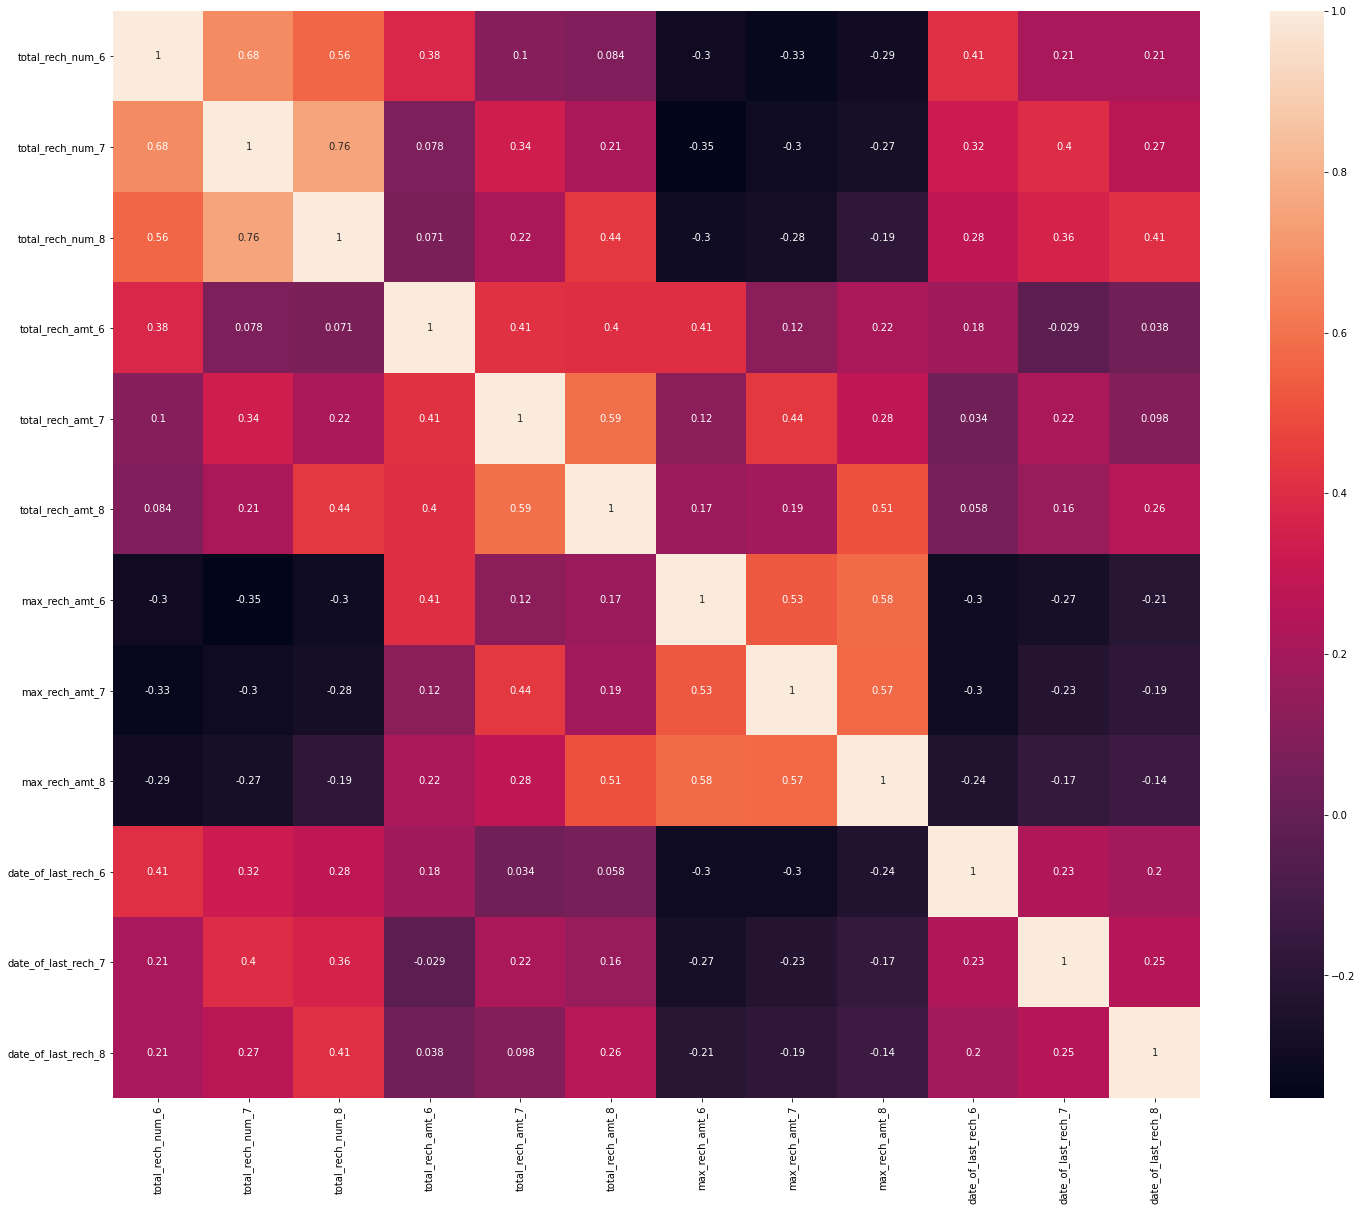

In [42]:
plt.figure(figsize=(25,20))
sns.heatmap(telecom_recharge.corr(),annot=True,square=True)
plt.show()

**Inferences Drawn:**
1. There is a high correlation between total number of recharge in the 7th and the 8th month.
2. Similiarly we see a high correlation between max recharge amount in the 7th and the 8th month as well.
3. The correlation between the any column and the 8th month is because of the churn prediction.
4. There is a good correlation between max recharge amount in the 6th and the 7th month as well.


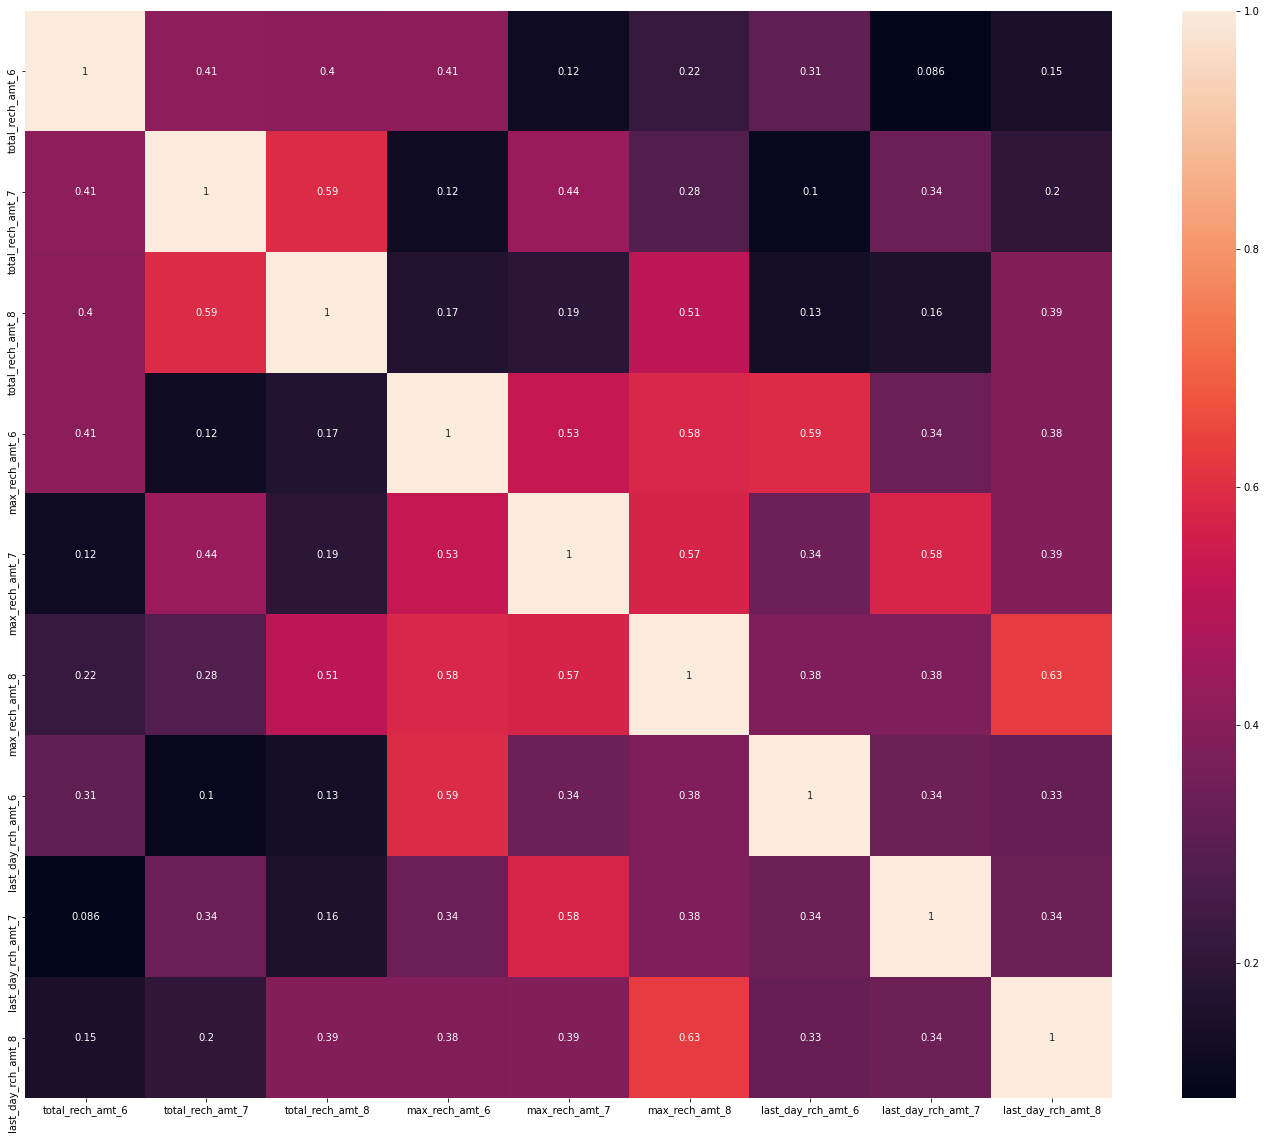

In [43]:
plt.figure(figsize=(25,20))
sns.heatmap(telecom_amount.corr(),annot=True,square=True)
plt.show()

**Inferences Drawn:**
1. There are not much correlations in this subset of the dataset.

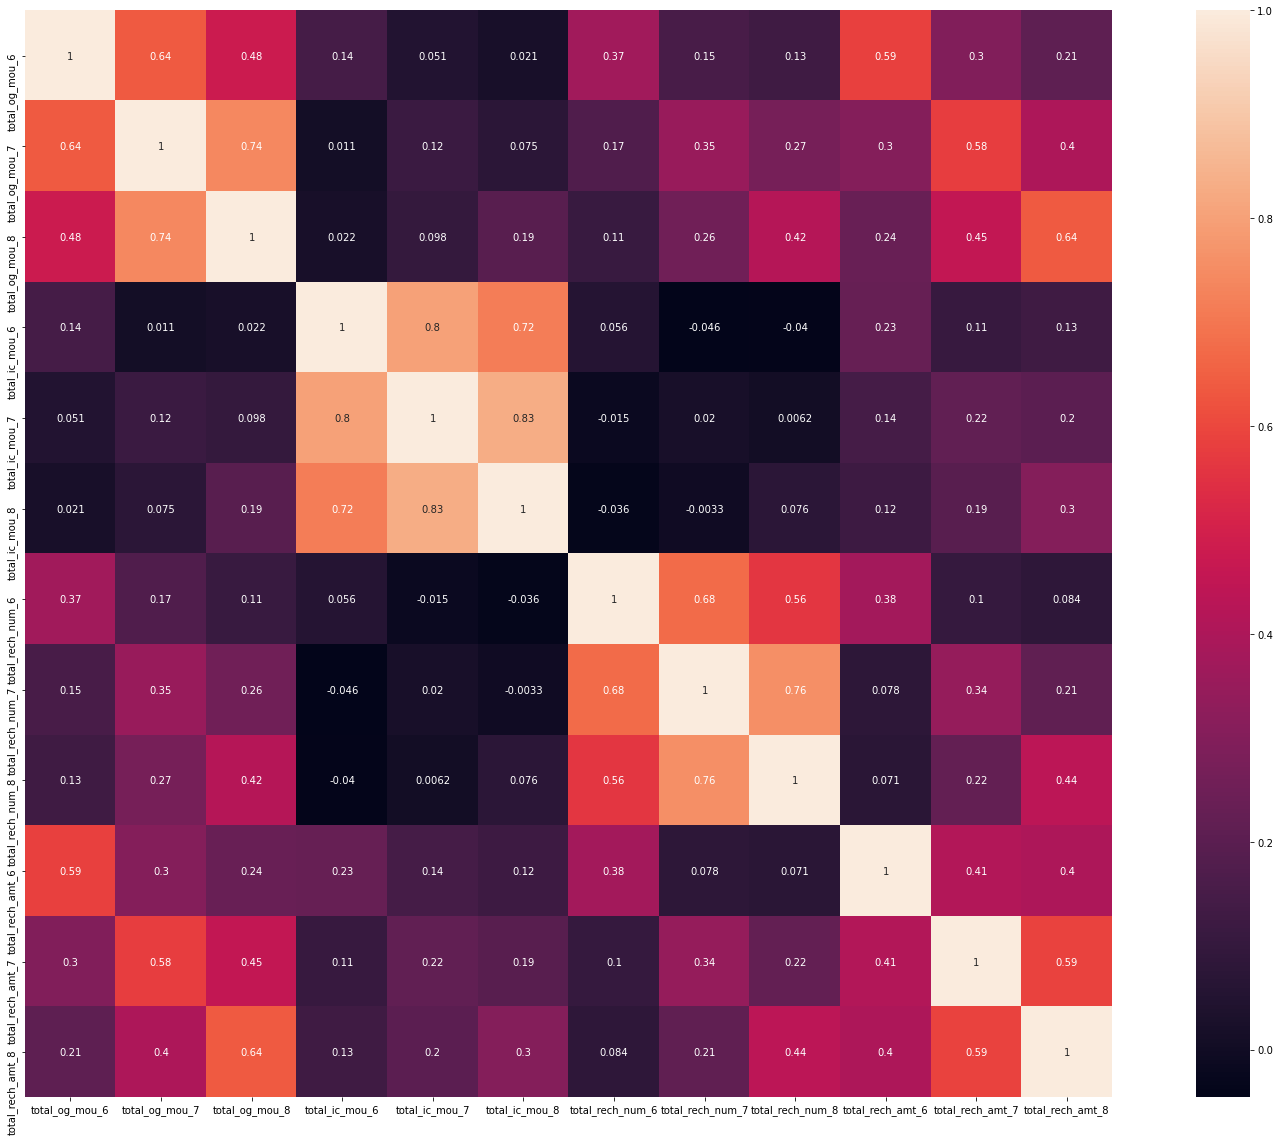

In [44]:
plt.figure(figsize=(30,20))
sns.heatmap(telecom_total.corr(),annot=True,square=True)
plt.show()

**Inferences Drawn:**
1. There is a high correlation between the total incoming and outgoing calls for the 6th and 7th month.
2. Similiarly there is a somewhat high correlation between the total incoming and outgoing calls for the 7th and 8th month.
3. This might be because of the fact that if there is heavy usage in the 7 th month, then the subsequent month will also have heavy usage. Hence the correlation.

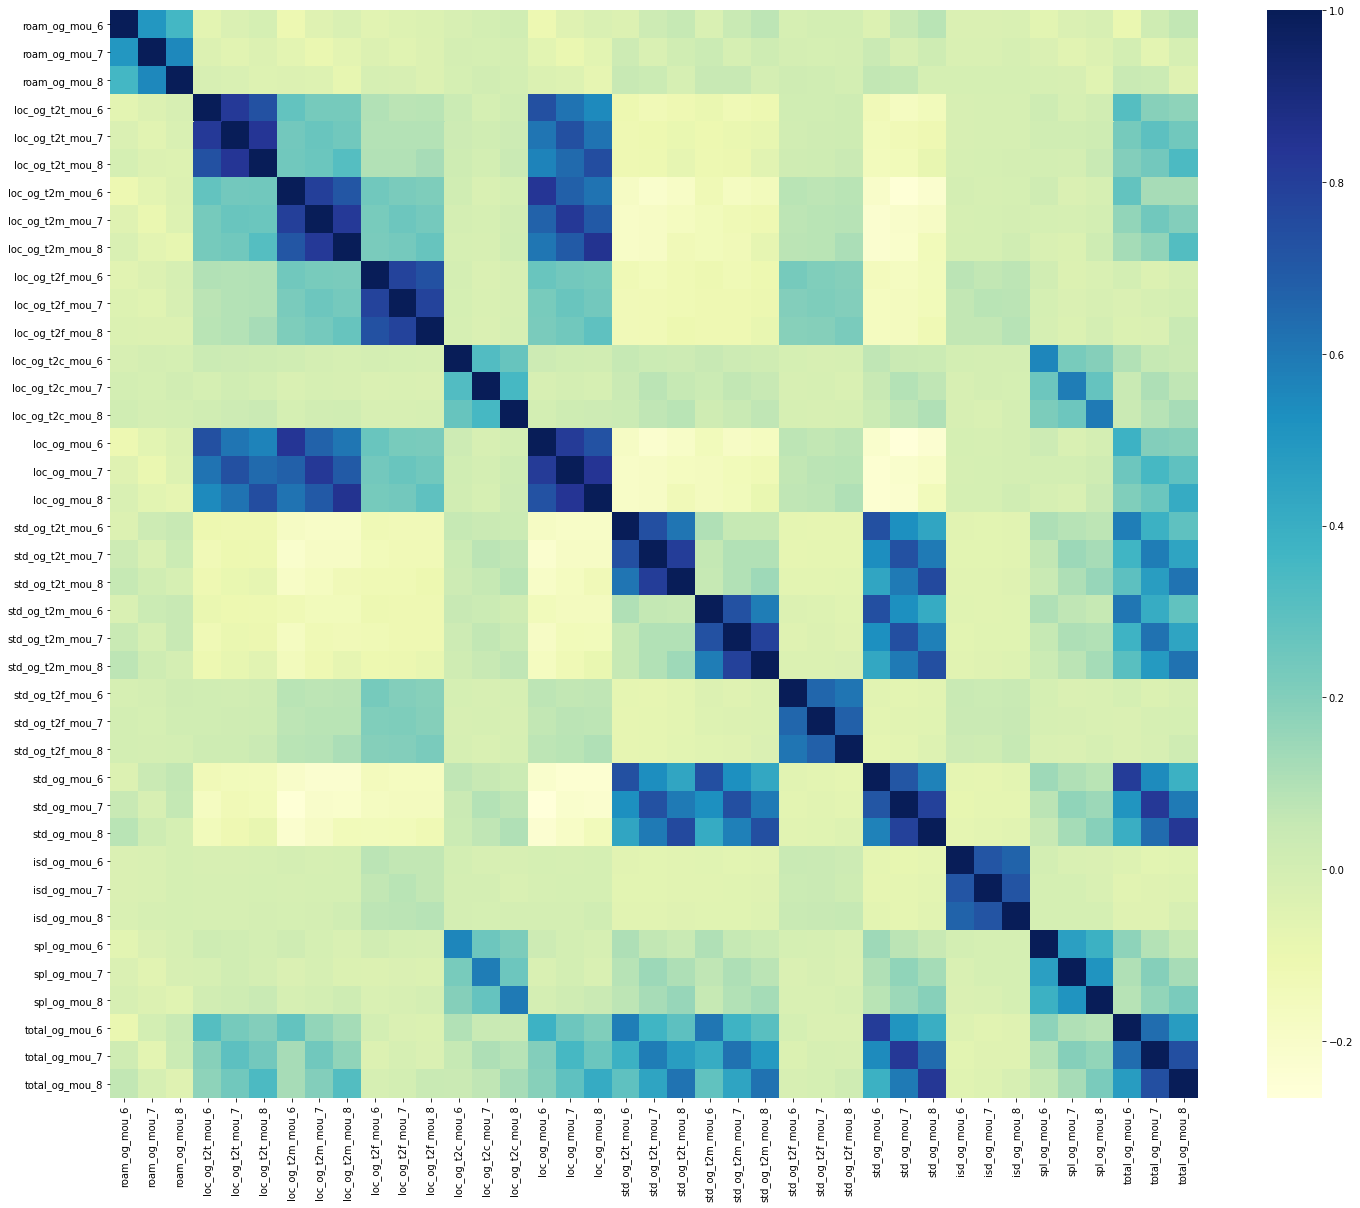

In [229]:
plt.figure(figsize=(25,20))
sns.heatmap(telecom_og_mou.corr(),square=True,cmap="YlGnBu")
plt.show()

**Inferences Drawn:**
1. The STD Outgoing MOU is highly correlated to the T2T Minutes of Usage
2. Total Outgoing minutes of usage of month 8 is also correlated to the month 7 which implies that if a customer has High MOU in month 7 then they will continue to have High MOU in month 8.
3. Total outgoing minutes of usage is almost entirely explained by the Std calls usage and not a lot by the Local calls

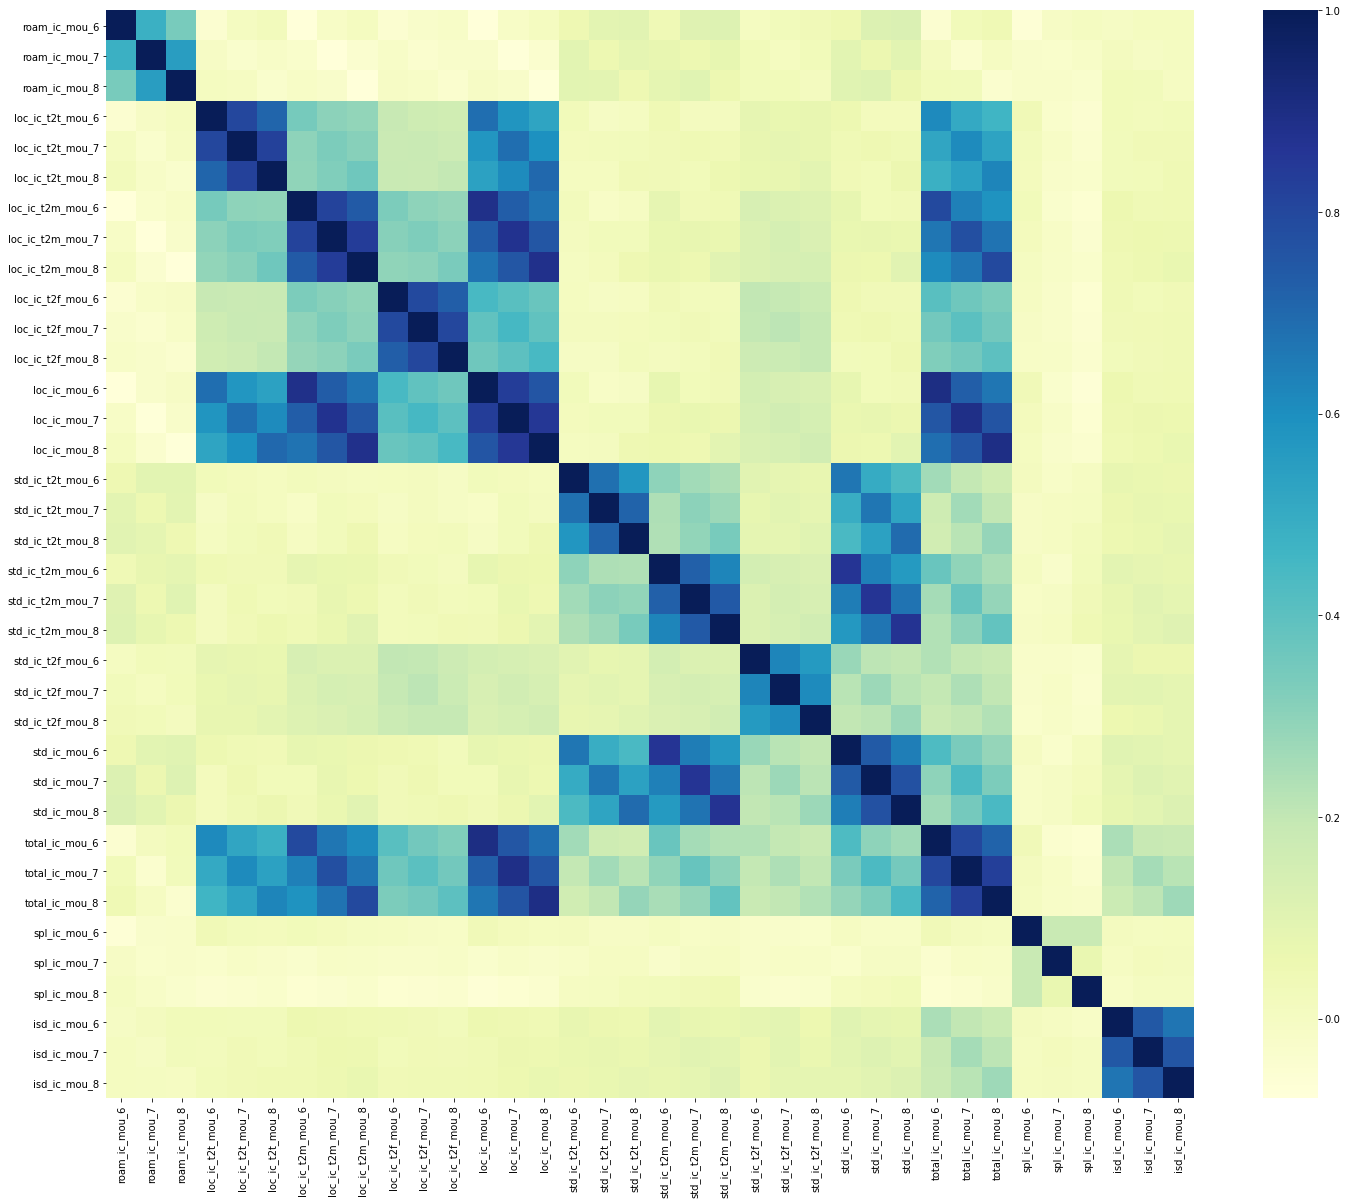

In [228]:
plt.figure(figsize=(25,20))
sns.heatmap(telecom_ic_mou.corr(),square=True, cmap="YlGnBu")
plt.show()

**Inferences Drawn:**
1. Total incoming calls is highly correlated with Local calls and not by std calls.
2. There is high correlation between Incoming T2T Usage for Months 6 and 7 and Months 7 and 8.
3. Total Incoming minutes of usage of month 8 is also correlated to the month 7, which implies that if a customer has High MOU in month 7 then they will continue to have High MOU in month 8

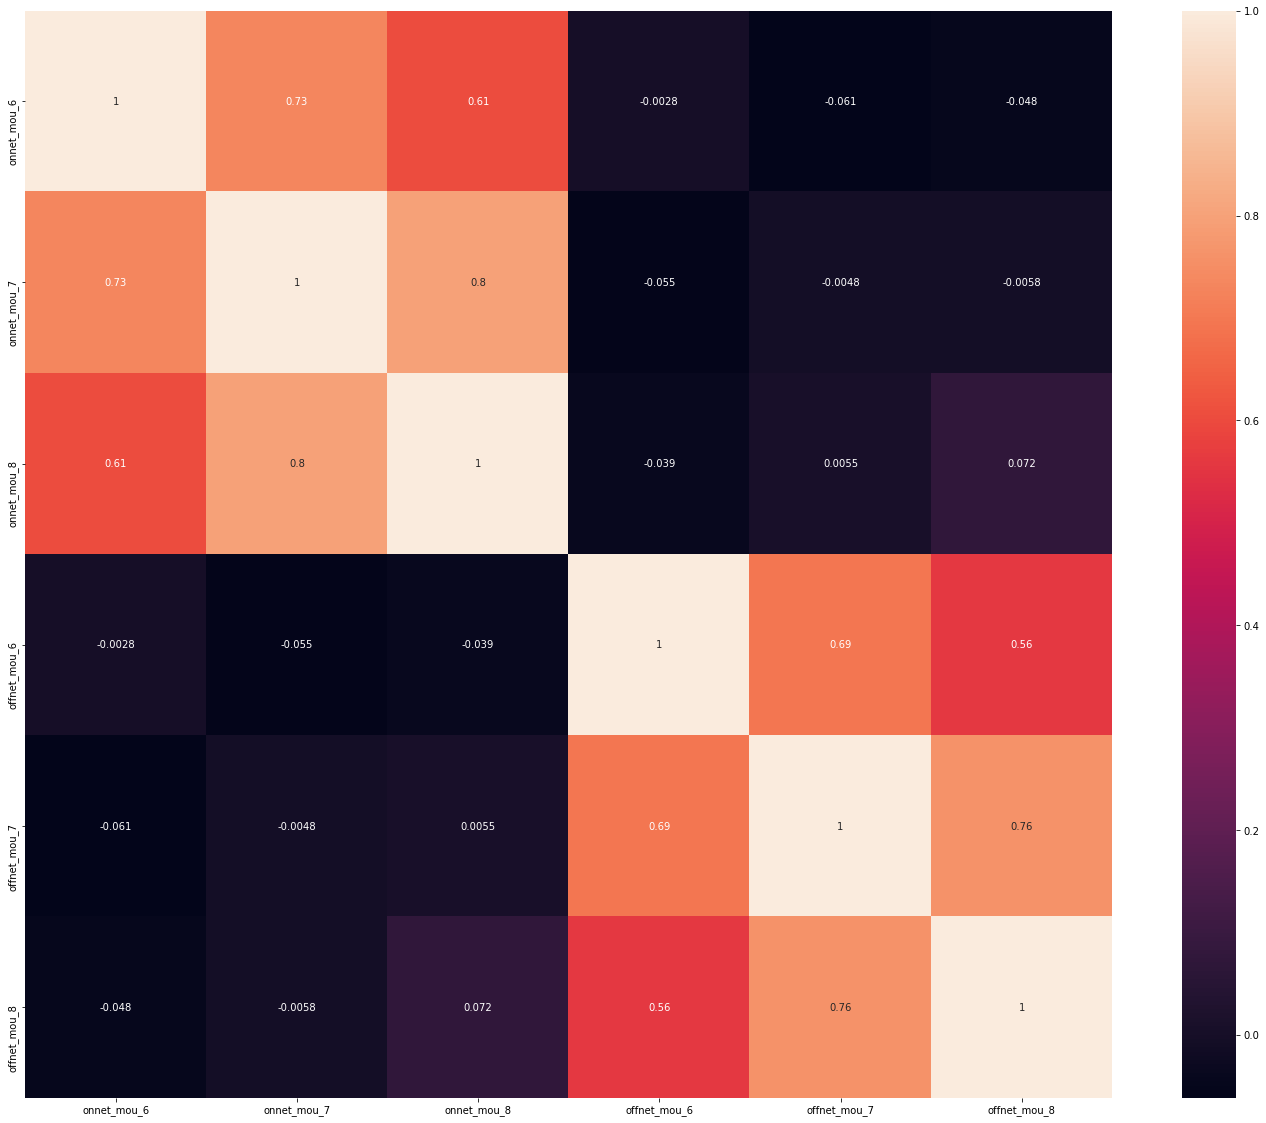

In [47]:
plt.figure(figsize=(25,20))
sns.heatmap(telecom_net.corr(),annot=True,square=True)
plt.show()

**Inferences Drawn:**
1. There is no correlation between offnet and onnet columns.
2. There is a high correlation between months 7 and 8 both for ONNET and OFFNET usage.

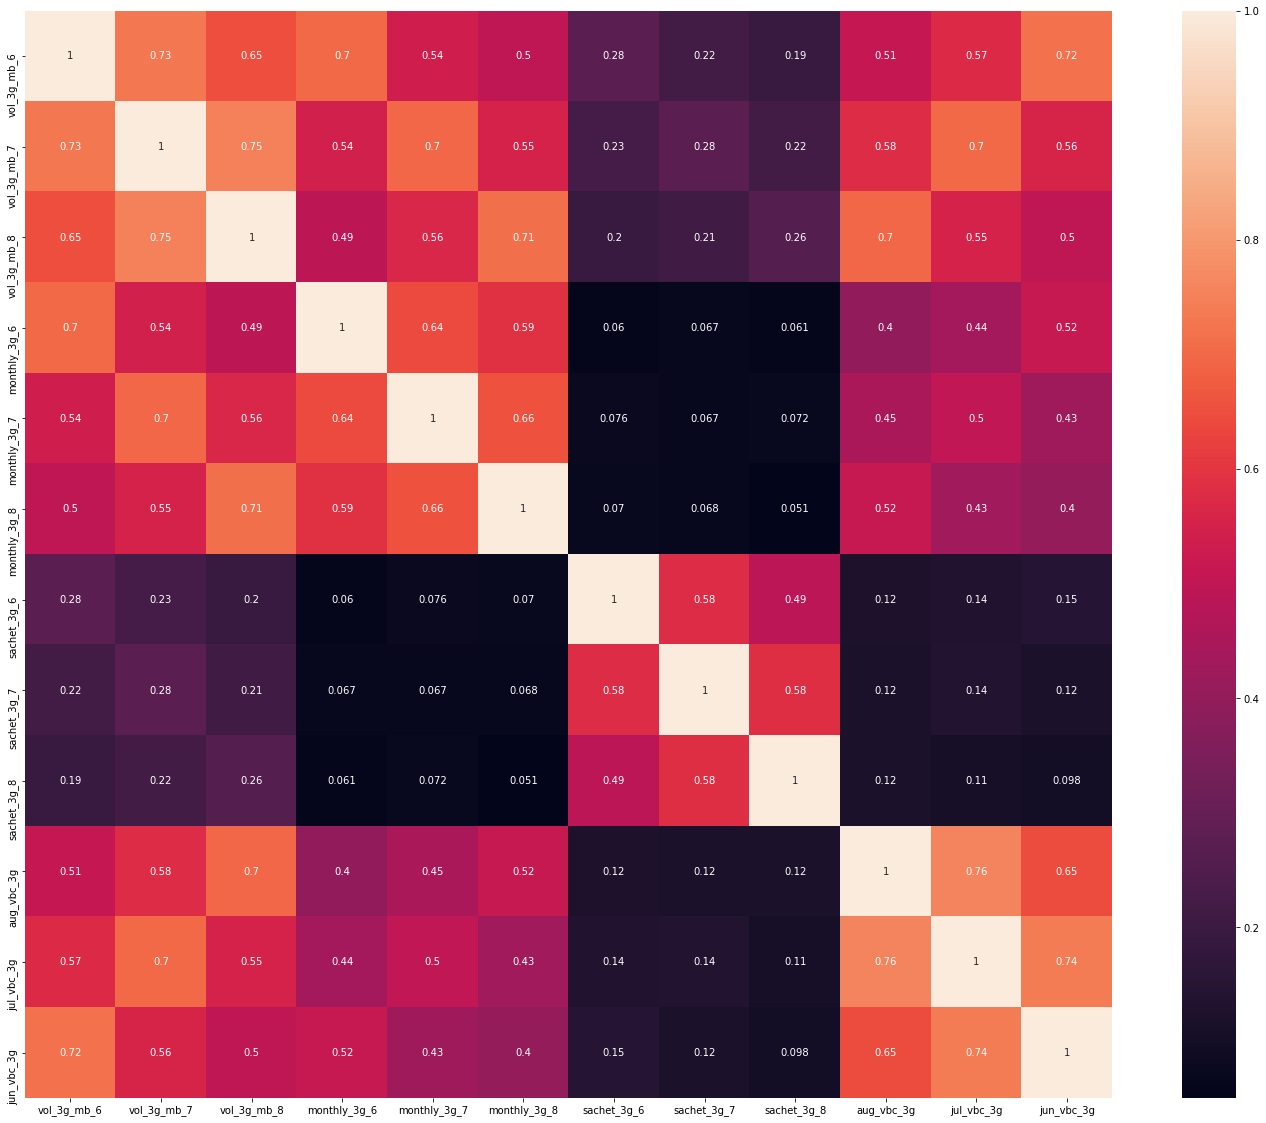

In [48]:
plt.figure(figsize=(25,20))
sns.heatmap(data_3g.corr(),annot=True,square=True)
plt.show()

**Inferences Drawn:**
1. There is a correlation between the 3g data usage in July and Aug.

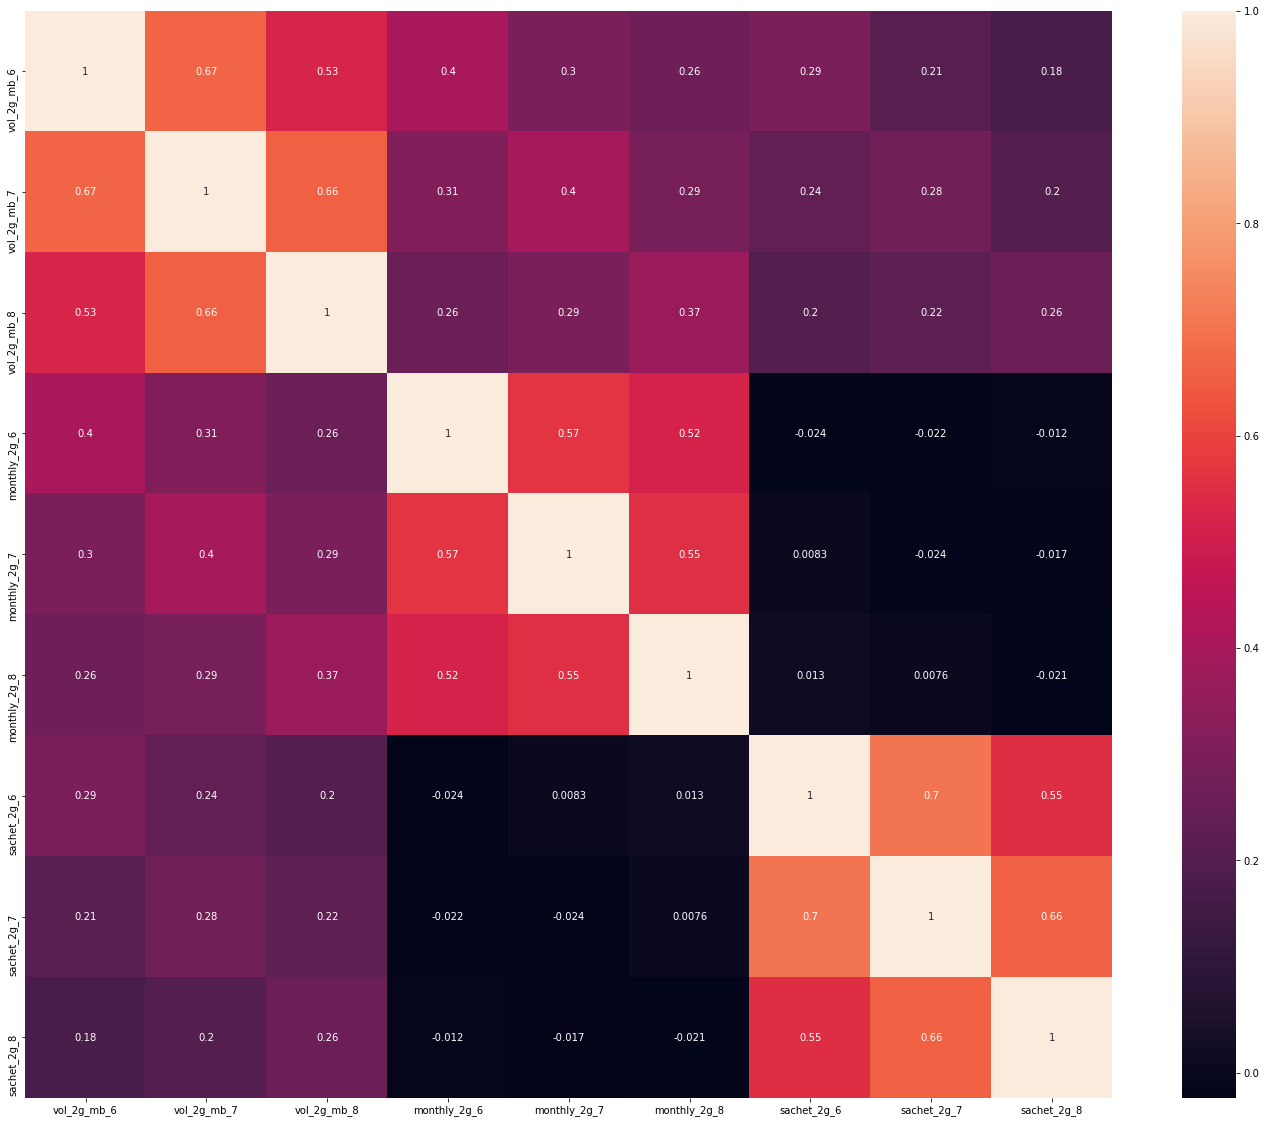

In [49]:
plt.figure(figsize=(25,20))
sns.heatmap(data_2g.corr(),annot=True,square=True)
plt.show()

**Inferences Drawn:**
1. A bit of a correaltion is seen in sachet 3g for the 7th month and sachet 2g for the 6th month

# Deriving new variables

**As we saw in EDA, we can take average of certain columns for the 6th and the 7th month.**

## Averaging the arpu columns

In [50]:
telecom["Average_ARPU_Good_Phase"]=(telecom["arpu_6"]+telecom["arpu_7"])/2

**Since there might be customers who have taken the service in the bad phase, we would replace those values in this derived column to those bad phase values.**

In [51]:
telecom['Average_ARPU_Good_Phase'] = np.where((telecom['arpu_8'] > 0) & 
                                              (telecom['Average_ARPU_Good_Phase'] == 0),
                                              telecom['arpu_8'],telecom['Average_ARPU_Good_Phase'])

In [52]:
#Dropping the initial columns as it is not needed anymore
telecom=telecom.drop(["arpu_6","arpu_7"],1)

## Averaging the Total Outgoing calls Minutes of usage columns

In [53]:
telecom["Average_OG_mou_Good_Phase"]=(telecom["total_og_mou_6"]+telecom["total_og_mou_7"])/2

In [54]:
telecom["Average_OG_mou_Good_Phase"]=np.where((telecom["total_og_mou_8"]>0) &
                                              (telecom["Average_OG_mou_Good_Phase"]==0),
                                              telecom["total_og_mou_8"],
                                              telecom["Average_OG_mou_Good_Phase"])

In [55]:
#Dropping columns which are not necessary
telecom=telecom.drop(["total_og_mou_6","total_og_mou_7"],1)

## Averaging the Total Incoming calls Minutes of usage columns

**We see that there are many 0 values we will try to treat them.**

In [56]:
telecom['Average_ic_mou_Good_Phase'] = (telecom['total_ic_mou_6'] + telecom['total_ic_mou_7'])/2

In [57]:
telecom["Average_ic_mou_Good_Phase"]=np.where((telecom["total_ic_mou_8"]>0) &
                                              (telecom["Average_ic_mou_Good_Phase"]==0),
                                              telecom["total_ic_mou_8"],
                                              telecom["Average_ic_mou_Good_Phase"])

In [58]:
#Dropping columns which are not necessary
telecom=telecom.drop(["total_ic_mou_6","total_ic_mou_7"],1)

## Averaging the onnet and offnet minutes of usage columns

In [59]:
telecom["Average_onnet_mou_gp"] = (telecom["onnet_mou_6"] + telecom["onnet_mou_7"])/2
telecom["Average_offnet_mou_gp"] = (telecom["offnet_mou_6"] + telecom["offnet_mou_7"])/2

In [60]:
#Dropping columns which are not necessary
telecom=telecom.drop(["onnet_mou_6","onnet_mou_7","offnet_mou_6","offnet_mou_7"],1)

## Binning the AON column

In [61]:
telecom["duration_bins"]=np.round(telecom["aon"]/365,1)
bins=[0,1,2,3,4,10]
telecom["duration_bins"]=pd.cut(telecom["duration_bins"],bins)

In [62]:
#Dropping the AON column
telecom=telecom.drop(["aon"],1)

**Since we already know that the internet usage over the 3 months period directly points at the churn rate the churn rate increases as the net usage decreases, we will use the net usage columns to figure out whether customer likely to churn or not.**

## Taking the median of all the net pack columns in order to capture the churn rate

In [63]:
telecom["internet_data_usage_median"] = telecom[["vol_2g_mb_6","vol_2g_mb_7","vol_2g_mb_8",
                                                 "vol_3g_mb_6","vol_3g_mb_7",
                                                 "vol_3g_mb_8"]].median(axis=1)
telecom["internet_data_usage_median"] = telecom.internet_data_usage_median.map(lambda x: 1 if x == 0 else 0)

In [64]:
##Dropping the unneccesary columsns
telecom=telecom.drop(["vol_2g_mb_6","vol_2g_mb_7","vol_2g_mb_8","vol_3g_mb_6","vol_3g_mb_7",
                      "vol_3g_mb_8"],1)

In [65]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Columns: 119 entries, mobile_number to internet_data_usage_median
dtypes: category(1), float64(93), int64(25)
memory usage: 28.3 MB


In [66]:
#Creating dummy variables for this categorical variable
telecom_aon=pd.get_dummies(telecom["duration_bins"],drop_first=True)

In [67]:
telecom_aon.head()

,"(1, 2]","(2, 3]","(3, 4]","(4, 10]"
7,0,1,0,0
8,0,0,0,0
13,0,0,0,1
16,1,0,0,0
17,1,0,0,0


In [68]:
telecom_aon.columns=["internet_usage_1_to_2","internet_usage_2_to_3","internet_usage_3_to_4",
                     "internet_usage_4_to_10"]

In [69]:
telecom_aon.head()

,internet_usage_1_to_2,internet_usage_2_to_3,internet_usage_3_to_4,internet_usage_4_to_10
7,0,1,0,0
8,0,0,0,0
13,0,0,0,1
16,1,0,0,0
17,1,0,0,0


In [70]:
telecom=pd.concat([telecom,telecom_aon],axis=1)

In [71]:
for cols in telecom.iloc[:,-4:]:
    telecom[cols]=telecom[cols].astype("int64")

In [72]:
telecom=telecom.drop(["duration_bins"],1)

## Checking for Class Imbalance after deriving new variables and Outlier Treatment

In [73]:
#Handling Class Imbalance
red_cols=[]
for col in telecom.columns:
    if (telecom[col].nunique()==1):
        red_cols.append(col)
red_cols

['og_others_7', 'og_others_8']

In [74]:
telecom=telecom.drop(red_cols,1)

In [75]:
telecom.shape

(29979, 120)

# Model Building

In [76]:
from sklearn.model_selection import train_test_split
X=telecom.drop(["mobile_number","Churn"],1)
y=telecom["Churn"]

In [77]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Standardising the Data

In [78]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [79]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20985, 118)
(8994, 118)
(20985,)
(8994,)


In [80]:
X_train=pd.DataFrame(X_train)
X_train.columns=X.columns
X_test=pd.DataFrame(X_test)
X_test.columns=X.columns
y_train=pd.DataFrame(y_train)
y_train.columns=["Churn"]
y_test=pd.DataFrame(y_test)
y_test.columns=["Churn"]

# Model Building

## PCA

In [81]:
from imblearn.over_sampling import SMOTE

In [82]:
oversample = SMOTE()
X_trainb, y_trainb = oversample.fit_resample(X_train, y_train)

In [83]:
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

In [84]:
pca.fit(X_trainb)

PCA(random_state=100)

In [85]:
print(pca.components_)

[[ 1.64963281e-01  3.33881062e-02  9.83223675e-02 ... -1.46473015e-02
   7.41462453e-03  8.79165485e-02]
 [ 1.55569502e-01  1.63528778e-01  1.52292153e-01 ...  1.64739817e-02
   5.46068177e-03 -5.55937567e-02]
 [ 1.26782168e-01  1.41178022e-02  4.04742688e-02 ...  3.98274270e-03
   1.85546589e-03  3.44167915e-02]
 ...
 [ 9.35250757e-03 -1.17924646e-01 -1.78728954e-01 ... -1.86177533e-04
  -3.55508297e-04 -2.01188960e-04]
 [-5.27084106e-03  2.52783707e-01  1.55671264e-01 ... -9.32824998e-04
   1.51878709e-03  4.41107522e-04]
 [-6.57865023e-03  5.93062153e-02  7.97364260e-02 ...  2.47596374e-04
  -6.81217958e-05 -1.87693579e-04]]


In [86]:
col_names=list(X_trainb.columns)
pca_df = pd.DataFrame({"PC1":pca.components_[0],"PC2":pca.components_[1], "PC3":pca.components_[2],
                       "PC4":pca.components_[3],"PC5":pca.components_[4],"Feature":col_names})
pca_df.head(10)

,PC1,PC2,PC3,PC4,PC5,Feature
0,0.164963,0.155570,0.126782,0.009266,-0.191357,arpu_8
1,0.033388,0.163529,0.014118,-0.041012,-0.119155,onnet_mou_8
2,0.098322,0.152292,0.040474,-0.016354,-0.049710,offnet_mou_8
3,-0.012929,-0.014016,0.313787,-0.153718,0.089233,roam_ic_mou_6
4,-0.029422,-0.016364,0.368076,-0.195334,0.132481,roam_ic_mou_7
5,-0.020893,0.013388,0.314949,-0.157730,0.101823,roam_ic_mou_8
6,-0.029894,-0.004393,0.315540,-0.180235,0.075353,roam_og_mou_6
7,-0.047664,-0.002064,0.366487,-0.216652,0.110921,roam_og_mou_7
8,-0.030966,0.035280,0.313539,-0.173162,0.067801,roam_og_mou_8
9,0.114720,0.005706,-0.056118,-0.144472,0.031685,loc_og_t2t_mou_6


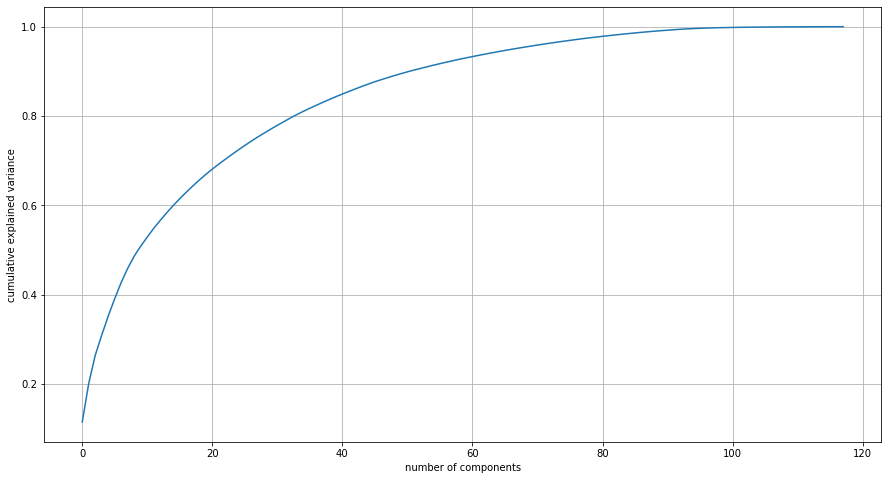

In [87]:
#Making the scree plot
%matplotlib inline
fig = plt.figure(figsize = (15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

**Looks like 85 components are enough to explain more than 90% of the variance in the data.**

### Checking for any correlations

In [88]:
#We will use PCA with 75 components to the train data
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=75)

df_train_pca = pca_final.fit_transform(X_trainb)
df_train_pca.shape

(38422, 75)

In [89]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

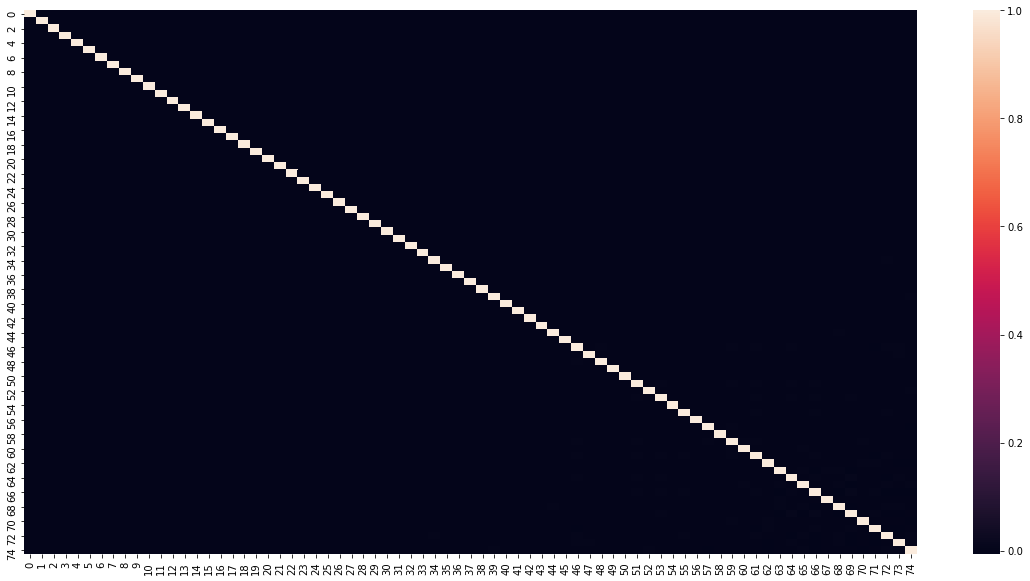

In [90]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat)
plt.show()

**We see that there are no correlations in the train_pca dataframe.**

## Logistic Regression with PCA Components

In [91]:
#Training a Logistic model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

log_reg_pca = LogisticRegression()
model_log_reg_pca = log_reg_pca.fit(df_train_pca,y_trainb)

In [92]:
#Applying selected components to the test data 
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8994, 75)

In [93]:
#Checking roc_auc score of this model
pred_probs_test = model_log_reg_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.88'

In [94]:
#Making prediction on the test data
pred_test = model_log_reg_pca.predict_proba(df_test_pca)
y_pred_default = model_log_reg_pca.predict(df_test_pca)

In [95]:
#Printing confusion matrix and accuracy score
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred_default))
print("The accuracy on test data is:",metrics.accuracy_score(y_test,y_pred_default))

[[6827 1352]
 [ 165  650]]
The accuracy on test data is: 0.8313319991105181


In [96]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred_default)
confusion_matrix

array([[6827, 1352],
       [ 165,  650]], dtype=int64)

In [97]:
TN=confusion_matrix[0,0]
FN=confusion_matrix[1,0]
FP=confusion_matrix[0,1]
TP=confusion_matrix[1,1]

In [98]:
#sensitivity
print("Sensitivity:", TP/float(TP+FN))

#Specificity
print("specificity", TN/float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

# Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity: 0.7975460122699386
specificity 0.834698618413009
false postive rate:  0.16530138158699106
positive predictive value:  0.3246753246753247
Negative predictive value:  0.9764016018306636
Misclassification Rate:  0.1686680008894819


In [99]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [100]:
y_pred_final.head()

,Churn,churn_prob
0,0,0.001038
1,0,0.074810
2,0,0.040961
3,0,0.385398
4,0,0.710517


In [101]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.Churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.8838299790650455


### ROC Curve

In [102]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

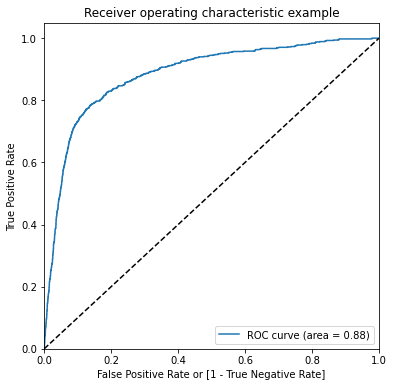

In [103]:
draw_roc(y_pred_final.Churn, y_pred_final.churn_prob)
plt.show()

### Finding Cut-off probability

In [104]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,Churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.001038,1,0,0,0,0,0,0,0,0,0
1,0,0.074810,1,0,0,0,0,0,0,0,0,0
2,0,0.040961,1,0,0,0,0,0,0,0,0,0
3,0,0.385398,1,1,1,1,0,0,0,0,0,0
4,0,0.710517,1,1,1,1,1,1,1,1,0,0


In [105]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.090616  0.000000  1.000000
0.1   0.1  0.490994  0.444798  0.954601
0.2   0.2  0.624639  0.595183  0.920245
0.3   0.3  0.718479  0.701920  0.884663
0.4   0.4  0.786969  0.781514  0.841718
0.5   0.5  0.831332  0.834699  0.797546
0.6   0.6  0.869024  0.879814  0.760736
0.7   0.7  0.895708  0.914659  0.705521
0.8   0.8  0.909384  0.942291  0.579141
0.9   0.9  0.913387  0.972613  0.319018


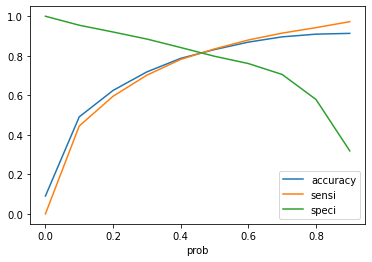

In [106]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**As we can see that the cut off frequency seems to be 0.4.**

In [107]:
# Finidng the optimal cutoff
import sys
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.Churn,y_pred_final.churn_prob)
print('Optimal Probability Threshold: ',threshold)

Optimal Probability Threshold:  [0.4662318370903609]


In [108]:
#Calculating final predictions using this probabilty value
y_pred_final['final_predicted'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.47 else 0)

y_pred_final.head()

,Churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.001038,1,0,0,0,0,0,0,0,0,0,0
1,0,0.074810,1,0,0,0,0,0,0,0,0,0,0
2,0,0.040961,1,0,0,0,0,0,0,0,0,0,0
3,0,0.385398,1,1,1,1,0,0,0,0,0,0,0
4,0,0.710517,1,1,1,1,1,1,1,1,0,0,1


In [109]:
#Printing the confusion matrix
confusion2=metrics.confusion_matrix(y_pred_final.Churn,y_pred_final.final_predicted)
confusion2

array([[6707, 1472],
       [ 150,  665]], dtype=int64)

In [110]:
TN=confusion2[0,0]
FN=confusion2[1,0]
FP=confusion2[0,1]
TP=confusion2[1,1]

In [111]:
#Accuracy
print("Accuracy: ",metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted))

#sensitivity
print("Sensitivity:", TP/float(TP+FN))

#Specificity
print("specificity", TN/float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

# Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))


Accuracy:  0.8196575494774294
Sensitivity: 0.8159509202453987
specificity 0.8200268981538086
false postive rate:  0.17997310184619147
positive predictive value:  0.31118390266729057
Negative predictive value:  0.9781245442613388
Misclassification Rate:  0.1803424505225706


# PCA with Principal Components explaining 90% variance

In [112]:
pca_again = PCA(0.9)

In [113]:
df_train_pca2=pca_again.fit_transform(X_trainb)
df_train_pca2.shape

(38422, 52)

In [114]:
#Training the model
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2, y_trainb)

In [115]:
df_test_pca2=pca_again.transform(X_test)
df_test_pca2.shape

(8994, 52)

In [116]:
#Making Predictions on test data
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.88'

In [117]:
#Predicting results
y_pred_pca2 = model_pca2.predict(df_test_pca2)

In [118]:
# Printing the Confusion matrix 
confusion_PCA = metrics.confusion_matrix(y_test, y_pred_pca2)
print(confusion_PCA)

[[6819 1360]
 [ 156  659]]


In [119]:
TN=confusion_PCA[0,0]
FN=confusion_PCA[1,0]
FP=confusion_PCA[0,1]
TP=confusion_PCA[1,1]

In [120]:
#Accuracy
print("Accuracy: ",metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted))

#sensitivity
print("Sensitivity:", TP/float(TP+FN))

#Specificity
print("specificity", TN/float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

# Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))


Accuracy:  0.8196575494774294
Sensitivity: 0.8085889570552147
specificity 0.8337205037290623
false postive rate:  0.16627949627093777
positive predictive value:  0.32639920752847945
Negative predictive value:  0.9776344086021506
Misclassification Rate:  0.16855681565488104


**Inferences Drawn:**
1. False Positives are still high.
2. After comparing the metrics, we see that the first logistic model by PCA should be prefered over the unsupervised model.
3. **Accuracy of the model:** 83%

# Logistic Regression Model with RFE

In [121]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [122]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg,20)
rfe = rfe.fit(X_trainb, y_trainb)

In [123]:
cols = list(X_trainb.columns[rfe.support_])
cols

['offnet_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_mou_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'date_of_last_rech_8',
 'last_day_rch_amt_8',
 'monthly_2g_8',
 'monthly_3g_8',
 'Average_onnet_mou_gp']

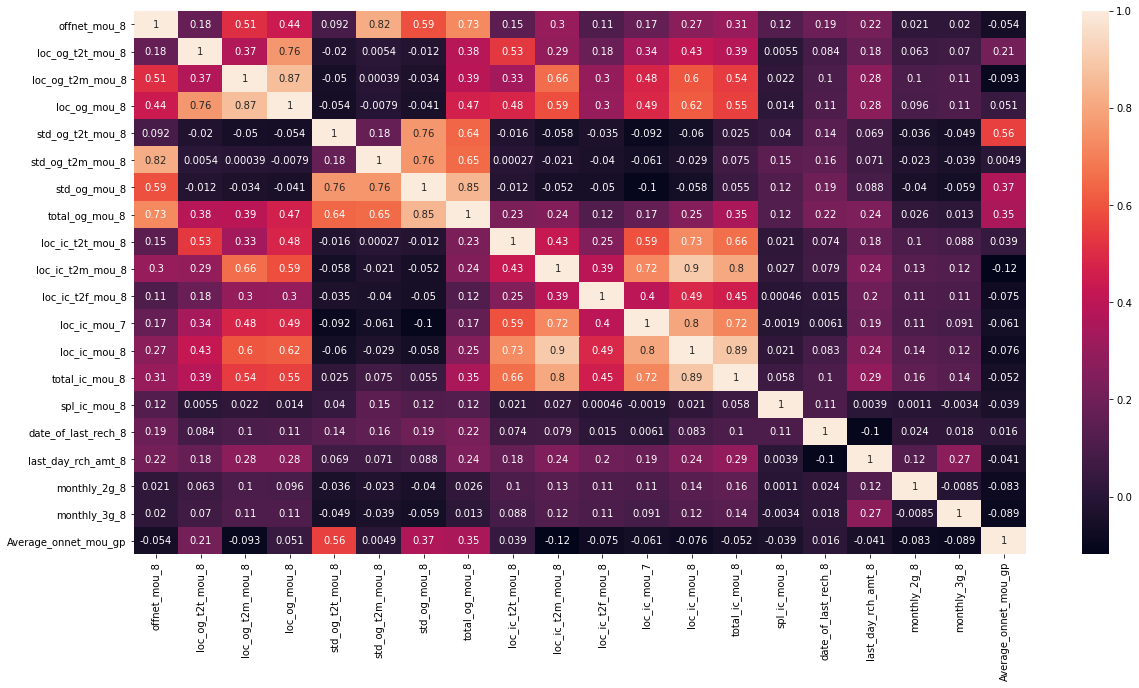

In [124]:
#Checking for correlations in the data
plt.figure(figsize=(20,10))
sns.heatmap(X_trainb[cols].corr(),annot=True)
plt.show()

In [125]:
X_rfe = pd.DataFrame(X_trainb).loc[:, cols]
y_rfe = y_trainb

In [126]:
#Removing the cols which are having high correlations
red_cols=["loc_ic_mou_8","loc_ic_t2m_mou_8","std_og_mou_8"]
X_rfe=X_rfe.drop(red_cols,1)

In [127]:
lr = LogisticRegression(random_state=100)
lr.fit(X_rfe, y_rfe)

LogisticRegression(random_state=100)

In [128]:
X_test.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Average_ARPU_Good_Phase,Average_OG_mou_Good_Phase,Average_ic_mou_Good_Phase,Average_onnet_mou_gp,Average_offnet_mou_gp,internet_data_usage_median,internet_usage_1_to_2,internet_usage_2_to_3,internet_usage_3_to_4,internet_usage_4_to_10
0,1.318405,1.790202,1.114115,-0.292398,-0.261707,-0.261119,-0.310106,-0.283478,-0.279165,6.074381,6.108060,6.020685,2.457659,2.740042,3.010074,-0.431437,-0.434435,-0.037864,-0.336272,-0.344281,-0.335063,4.655071,4.613882,4.580300,-0.512370,-0.517098,-0.469291,-0.428061,-0.425658,-0.416868,-0.246882,-0.243394,0.366702,-0.624504,-0.627515,-0.572845,-0.16385,-0.165004,-0.154274,-0.392721,0.158797,-0.205854,1.156158,1.918236,5.711347,3.258576,5.852629,0.815636,2.126180,1.635933,-0.368195,-0.023929,1.552170,2.745354,2.602414,3.427020,-0.407508,-0.405282,-0.387650,0.349243,0.369618,0.381851,-0.27993,-0.278939,-0.280672,0.029344,0.034760,0.050925,2.809180,-0.441384,-0.203254,-0.259295,-0.257297,-0.272158,-0.254953,-0.259606,-0.265084,-0.258167,0.116917,-0.314593,0.100045,0.869554,0.544943,1.551202,-0.389275,-0.403449,-0.207536,0.275346,-0.360150,0.800223,0.085617,0.066820,0.342910,-0.338874,-0.34635,-0.327178,-0.34105,-0.354162,-0.373371,-0.325691,-0.331945,-0.324690,-0.238678,-0.234020,-0.220712,-0.380475,-0.375528,-0.359906,0.914324,2.361107,2.318847,2.425754,0.911990,0.671374,1.746309,-0.423474,-0.335139,-0.686205
1,0.055752,-0.276737,0.515316,0.594598,-0.261707,-0.261119,0.261290,-0.283478,-0.279165,0.502207,0.327195,0.496076,0.642825,1.322993,2.013164,-0.101371,0.037574,-0.209843,-0.336272,-0.344281,-0.332806,0.638977,1.000028,1.517511,-0.512370,-0.517098,-0.469291,-0.547348,-0.528052,-0.509732,-0.246882,-0.243394,-0.240085,-0.701735,-0.694405,-0.636081,-0.16385,-0.112552,-0.154274,-0.462682,-0.424216,-0.420207,-0.385626,0.192356,0.804218,0.572330,0.781672,0.583477,0.704837,0.715961,-0.278385,0.040068,0.781636,0.635676,0.662608,0.828116,-0.358444,-0.405282,-0.387650,-0.453560,-0.400663,-0.390659,-0.27993,-0.278939,-0.280672,-0.487148,-0.467880,-0.452062,0.521864,-0.441384,-0.203254,-0.259295,-0.257297,-0.270350,-0.254953,-0.078322,-0.265084,-0.133788,-0.462944,-0.314593,-0.356827,-0.129966,0.052751,0.059751,-0.270674,-0.275730,-0.111021,-0.218322,0.816886,0.398013,0.250181,0.241461,0.469118,-0.338874,-0.34635,-0.327178,-0.34105,-0.354162,-0.373371,-0.325691,-0.331945,-0.324690,-0.238678,-0.234020,-0.220712,-0.380

In [129]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [130]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.Churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC Score: ',roc_auc)

ROC_AUC Score:  0.8838299790650455


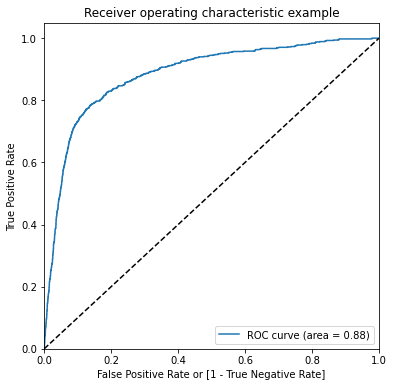

(array([0.        , 0.        , 0.        , ..., 0.99975547, 0.99987774,
        1.        ]),
 array([0.        , 0.00122699, 0.00245399, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99767461e+00, 9.97674609e-01, 9.97627855e-01, ...,
        6.19041939e-06, 1.24028630e-06, 3.46784478e-07]))

In [131]:
draw_roc(y_pred_final.Churn, y_pred_final.churn_prob)

**The ROC_AUC score has improved after removing the highly correalated columns.**

In [132]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,Churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.001038,1,0,0,0,0,0,0,0,0,0
1,0,0.074810,1,0,0,0,0,0,0,0,0,0
2,0,0.040961,1,0,0,0,0,0,0,0,0,0
3,0,0.385398,1,1,1,1,0,0,0,0,0,0
4,0,0.710517,1,1,1,1,1,1,1,1,0,0


In [133]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.090616  0.000000  1.000000
0.1   0.1  0.490994  0.444798  0.954601
0.2   0.2  0.624639  0.595183  0.920245
0.3   0.3  0.718479  0.701920  0.884663
0.4   0.4  0.786969  0.781514  0.841718
0.5   0.5  0.831332  0.834699  0.797546
0.6   0.6  0.869024  0.879814  0.760736
0.7   0.7  0.895708  0.914659  0.705521
0.8   0.8  0.909384  0.942291  0.579141
0.9   0.9  0.913387  0.972613  0.319018


<AxesSubplot:xlabel='prob'>

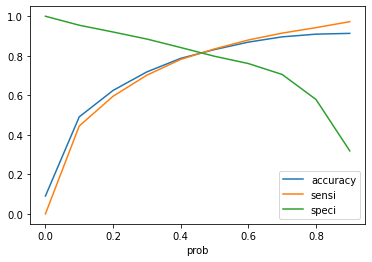

In [134]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [135]:
## Finidng the optimal cutoff
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.Churn,y_pred_final.churn_prob)
print('CutOff threshold: ', threshold)

CutOff threshold:  [0.4662318370903609]


In [136]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.49 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.47 else 0)

y_pred_final.Churn.value_counts()

0    8179
1     815
Name: Churn, dtype: int64

In [137]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.pred_churn )
confusion

array([[6621, 1558],
       [ 141,  674]], dtype=int64)

In [138]:
TN=confusion[0,0]
FN=confusion[1,0]
FP=confusion[0,1]
TP=confusion[1,1]

In [139]:
#Accuracy
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred_default))

#sensitivity
print("Sensitivity:", TP/float(TP+FN))

#Specificity
print("specificity", TN/float(TN+FP))

# Calculate false postive rate 
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

# Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy:  0.8313319991105181
Sensitivity: 0.8269938650306748
specificity 0.8095121653013816
false postive rate:  0.1904878346986184
positive predictive value:  0.30197132616487454
Negative predictive value:  0.979148181011535
Misclassification Rate:  0.18890371358683566


In [140]:
# Getting the weights of all the variables predicted by the model
weights = pd.Series(lr.coef_[0],
                 index=X_rfe.columns)
weights.sort_values(ascending = False)

loc_og_mou_8            2.653330
offnet_mou_8            2.591510
std_og_t2t_mou_8        1.997944
loc_ic_mou_7            0.502194
Average_onnet_mou_gp    0.471364
std_og_t2m_mou_8        0.193486
loc_ic_t2t_mou_8       -0.163939
loc_ic_t2f_mou_8       -0.477689
monthly_3g_8           -0.480199
spl_ic_mou_8           -0.539414
monthly_2g_8           -0.570936
date_of_last_rech_8    -0.635322
loc_og_t2t_mou_8       -0.677923
last_day_rch_amt_8     -0.795014
total_ic_mou_8         -1.295919
loc_og_t2m_mou_8       -2.203170
total_og_mou_8         -4.442714
dtype: float64

**Logistic Regression with RFE (20 variables):**  
1. Accuracy:  0.8313319991105181
2. Sensitivity: 0.8269938650306748
3. specificity 0.8095121653013816
4. false postive rate:  0.1904878346986184
5. positive predictive value:  0.30197132616487454
6. Negative predictive value:  0.979148181011535
7. Misclassification Rate:  0.18890371358683566 

**Logistic Regression with PCA:**
1. Accuracy on test data:  0.8225483655770514
2. Sensitivity: 0.807361963190184
3. specificity 0.8359212617679422
4. false postive rate:  0.1640787382320577
5. positive predictive value:  0.329
6. Negative predictive value:  0.9775521875893624
7. Misclassification Rate:  0.16666666666666666

# Random Forest on all the features

## Random Forest with Default Hyper Parameters

In [141]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [142]:
#fittingg the model
rfc.fit(X_trainb,y_trainb)

RandomForestClassifier()

In [143]:
# Making predictions
predictions = rfc.predict(X_test)

In [144]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      8179
           1       0.64      0.66      0.65       815

    accuracy                           0.93      8994
   macro avg       0.80      0.81      0.81      8994
weighted avg       0.94      0.93      0.94      8994

[[7875  304]
 [ 281  534]]
0.9349566377585057


In [145]:
# Confusion Matrix
confusion1=confusion_matrix(y_test,predictions)
confusion1

array([[7875,  304],
       [ 281,  534]], dtype=int64)

In [146]:
TN=confusion1[0,0]
FN=confusion1[1,0]
FP=confusion1[0,1]
TP=confusion1[1,1]

In [147]:
#Accuracy
print("Accuracy: ",metrics.accuracy_score(y_test,predictions))

#sensitivity
print("Sensitivity:", TP/float(TP+FN))

#Specificity
print("specificity", TN/float(TN+FP))

# Calculate false postive rate 
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

# Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy:  0.9349566377585057
Sensitivity: 0.6552147239263804
specificity 0.9628316420100257
false postive rate:  0.037168357989974324
positive predictive value:  0.6372315035799523
Negative predictive value:  0.9655468366846494
Misclassification Rate:  0.06504336224149433


**As we can see that with using the default hyperparameters, we get a good accuracy score on the test set but the sensitivity is poor. Hence we will tune the hyperparameters in order to get good results.**

In [148]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds,scoring="accuracy",n_jobs=-1,return_train_score=True)

In [149]:
rf.fit(X_trainb, y_trainb)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [150]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.090395,0.922343,0.122895,0.016538,2,{'max_depth': 2},0.848406,0.853351,0.845263,0.852551,0.864263,0.852767,0.006448,4,0.865602,0.856460,0.842508,0.848396,0.854805,0.853554,0.007795
1,20.614026,1.279449,0.190164,0.006694,7,{'max_depth': 7},0.891607,0.919063,0.920875,0.921916,0.919443,0.914581,0.011532,3,0.933956,0.923415,0.921303,0.921758,0.921075,0.924301,0.004896
2,33.017471,2.026658,0.295855,0.006392,12,{'max_depth': 12},0.926350,0.958751,0.960698,0.962520,0.963431,0.954350,0.014092,2,0.983538,0.980447,0.979504,0.978268,0.980220,0.980395,0.001745
3,36.861040,1.427236,0.289461,0.030525,17,{'max_depth': 17},0.938452,0.968640,0.971109,0.971109,0.972150,0.964292,0.012972,1,0.993233,0.992224,0.991997,0.991997,0.991281,0.992146,0.000629


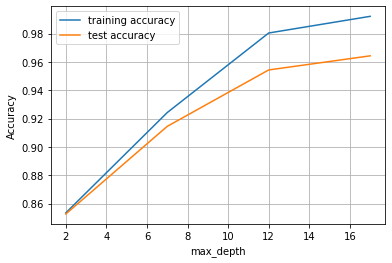

In [151]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"],scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_max_depth"],scores["mean_test_score"],label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


In [152]:
n_folds = 5
parameters = {'n_estimators': range(100, 1000, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10)

# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds,scoring="accuracy",n_jobs=-1,return_train_score=True)
rf.fit(X_trainb, y_trainb)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10), n_jobs=-1,
             param_grid={'n_estimators': range(100, 1000, 400)},
             return_train_score=True, scoring='accuracy')

In [153]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,30.469508,2.951619,0.291382,0.037991,100,{'n_estimators': 100},0.915290,0.946259,0.948074,0.949766,0.950547,0.941987,0.013430,3,0.970101,0.964050,0.962685,0.962197,0.961839,0.964174,0.003057
1,169.656438,5.530980,1.632334,0.198795,500,{'n_estimators': 500},0.914899,0.946649,0.948725,0.949505,0.950286,0.942013,0.013611,2,0.969971,0.963887,0.963530,0.962294,0.962457,0.964428,0.002838
2,280.838848,21.600650,2.297228,0.286430,900,{'n_estimators': 900},0.914639,0.948861,0.948985,0.950286,0.951197,0.942794,0.014104,1,0.970004,0.964928,0.963661,0.962685,0.962717,0.964799,0.002728


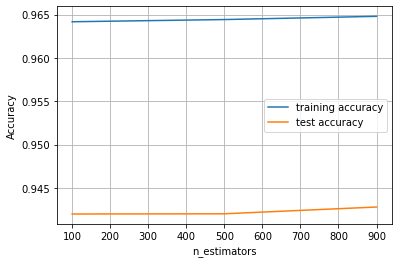

In [154]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"],scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_n_estimators"],scores["mean_test_score"],label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [155]:
n_folds = 5
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10)


# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds,scoring="accuracy",return_train_score=True)
rf.fit(X_trainb, y_trainb)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [156]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.468632,0.203885,0.204070,0.011416,4,{'max_features': 4},0.904099,0.934027,0.934930,0.938053,0.940396,0.930301,0.013296,5,0.961252,0.949930,0.950680,0.951298,0.953218,0.953275,0.004134
1,15.689368,0.129110,0.206658,0.006869,8,{'max_features': 8},0.911646,0.945478,0.946122,0.946512,0.945992,0.939150,0.013756,4,0.966880,0.962423,0.961448,0.960700,0.958748,0.962040,0.002704
2,26.543745,0.117737,0.193097,0.004447,14,{'max_features': 14},0.917372,0.949512,0.950937,0.952238,0.954191,0.944850,0.013825,3,0.971630,0.966295,0.965417,0.963758,0.965938,0.966608,0.002657
3,36.557704,1.837475,0.188087,0.003662,20,{'max_features': 20},0.918673,0.950553,0.954060,0.955362,0.954581,0.946646,0.014083,2,0.972541,0.967856,0.967044,0.966036,0.965352,0.967766,0.002536
4,44.811992,0.193355,0.188903,0.008793,24,{'max_features': 24},0.919584,0.951464,0.955752,0.955492,0.954971,0.947453,0.014020,1,0.972932,0.968474,0.966328,0.966589,0.967239,0.968312,0.002426


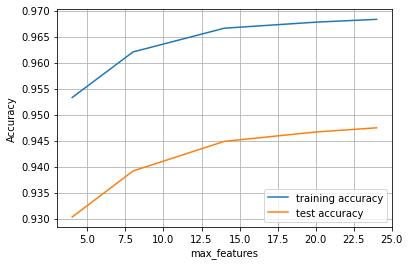

In [157]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"],scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_max_features"],scores["mean_test_score"],label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [158]:
# GridSearchCV to find optimal min_samples_leaf
n_folds = 5
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds,scoring="accuracy",return_train_score=True)
rf.fit(X_trainb, y_trainb)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [159]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,17.635235,0.292922,0.178744,0.000741,100,{'min_samples_leaf': 100},0.883539,0.909304,0.910203,0.914888,0.913196,0.906226,0.011520,1,0.919153,0.910922,0.910339,0.909461,0.910925,0.912160,0.003537
1,16.436171,0.783322,0.169585,0.014343,150,{'min_samples_leaf': 150},0.878595,0.904359,0.906559,0.907600,0.906559,0.900734,0.011120,2,0.910922,0.902853,0.905134,0.901165,0.901425,0.904300,0.003598
2,17.005151,1.067087,0.171093,0.020369,200,{'min_samples_leaf': 200},0.877293,0.897983,0.900833,0.901744,0.904217,0.896414,0.009766,3,0.907571,0.899665,0.897423,0.897423,0.898822,0.900181,0.003793
3,15.945513,0.549013,0.181156,0.025661,250,{'min_samples_leaf': 250},0.875342,0.893689,0.896538,0.903045,0.903175,0.894358,0.010198,4,0.902886,0.893679,0.896447,0.895862,0.896090,0.896993,0.003102
4,15.340388,0.932986,0.150901,0.029220,300,{'min_samples_leaf': 300},0.870397,0.893038,0.894196,0.899141,0.900703,0.891495,0.010937,5,0.898852,0.892638,0.892999,0.892739,0.892739,0.893993,0.002432


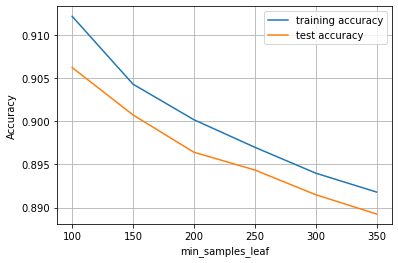

In [160]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"],scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_min_samples_leaf"],scores["mean_test_score"],label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [161]:
n_folds = 5
parameters = {'min_samples_split': range(100, 700, 50)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds,scoring="accuracy",return_train_score=True)
rf.fit(X_trainb, y_trainb)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(100, 700, 50)},
             return_train_score=True, scoring='accuracy')

In [162]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,28.674393,0.794834,0.243050,0.023114,100,{'min_samples_split': 100},0.897853,0.934938,0.938834,0.940916,0.940786,0.930665,0.016548,1,0.959788,0.948076,0.946678,0.947589,0.949346,0.950295,0.004824
1,27.910623,0.650332,0.258056,0.043594,150,{'min_samples_split': 150},0.892128,0.929863,0.929984,0.934019,0.929854,0.923170,0.015603,2,0.947100,0.936981,0.934674,0.935877,0.934544,0.937835,0.004716
2,26.252655,0.693252,0.230395,0.010660,200,{'min_samples_split': 200},0.888614,0.921796,0.926991,0.929724,0.926080,0.918641,0.015228,3,0.938966,0.928262,0.928395,0.927126,0.928655,0.930281,0.004374
3,25.607146,0.393133,0.210718,0.007576,250,{'min_samples_split': 250},0.887964,0.918022,0.919573,0.924779,0.923347,0.914737,0.013609,4,0.934997,0.922634,0.921107,0.922214,0.924556,0.925102,0.005071
4,25.023196,0.868246,0.209353,0.021054,300,{'min_samples_split': 300},0.886272,0.916591,0.917621,0.920614,0.919964,0.912212,0.013054,5,0.929791,0.919153,0.918017,0.917984,0.918830,0.920755,0.004541


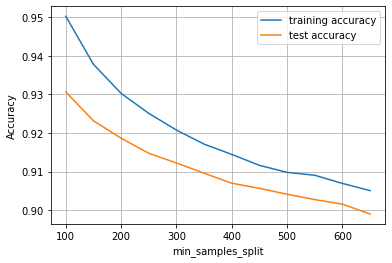

In [163]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"],scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_min_samples_split"],scores["mean_test_score"],label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [164]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Creating the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10,12],
    'min_samples_leaf': range(150, 250, 50),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': [300,350,450], 
    'max_features': [20,21]
}
# Create the  model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 3, verbose = 1, n_jobs=-1)

In [165]:
#Fitting the  model
grid_search.fit(X_trainb,y_trainb)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 11], 'max_features': [20, 21],
                         'min_samples_leaf': range(150, 250, 50),
                         'min_samples_split': range(200, 400, 100),
                         'n_estimators': [300, 350, 450]},
             refit='recall_score', verbose=1)

In [166]:
#Checking for the accuracy of the model
grid_search.best_score_

0.901775268447122

In [167]:
grid_search.best_params_

{'max_depth': 11,
 'max_features': 21,
 'min_samples_leaf': 150,
 'min_samples_split': 200,
 'n_estimators': 350}

In [168]:
#Checking for the best set of hyper parameters
grid_search.best_estimator_[0]

DecisionTreeClassifier(max_depth=11, max_features=21, min_samples_leaf=150,
                       min_samples_split=200, random_state=163950329)

In [169]:
rf_best=grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=11, max_features=21, min_samples_leaf=150,
                       min_samples_split=200, n_estimators=350)

In [212]:
rf_best = RandomForestClassifier(max_depth=11,
                                  min_samples_leaf=150, 
                                  min_samples_split=200,
                                  n_estimators=350 ,
                                  oob_score = True, n_jobs = -1,
                                  random_state =100,
                                  max_features = 21)
rf_best.fit(X_trainb,y_trainb)

RandomForestClassifier(max_depth=11, max_features=21, min_samples_leaf=150,
                       min_samples_split=200, n_estimators=350, n_jobs=-1,
                       oob_score=True, random_state=100)

In [213]:
#predict on test set
predictions = rf_best.predict(X_test)

In [214]:
confusion = metrics.confusion_matrix(y_test, predictions )
confusion

array([[7500,  679],
       [ 188,  627]], dtype=int64)

In [215]:
TN=confusion[0,0]
FN=confusion[1,0]
FP=confusion[0,1]
TP=confusion[1,1]

In [216]:
#Accuracy
print("Accuracy: ",metrics.accuracy_score(y_test,predictions))

#sensitivity
print("Sensitivity:", TP/float(TP+FN))

#Specificity
print("specificity", TN/float(TN+FP))

# Calculate false postive rate 
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

# Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy:  0.9036024016010674
Sensitivity: 0.7693251533742331
specificity 0.9169825162000245
false postive rate:  0.08301748379997555
positive predictive value:  0.48009188361408883
Negative predictive value:  0.9755463059313215
Misclassification Rate:  0.09639759839893262


In [223]:
imp_df=pd.DataFrame({
    "Varname":X_trainb.columns,
    "Imp":rf_best.feature_importances_})

In [224]:
imp_df.sort_values(by="Imp",ascending=False)

,Varname,Imp
68,total_ic_mou_8,1.602319e-01
83,total_rech_amt_8,1.150061e-01
8,roam_og_mou_8,9.834303e-02
5,roam_ic_mou_8,8.776681e-02
0,arpu_8,7.693397e-02
86,max_rech_amt_8,5.939233e-02
43,total_og_mou_8,5.672232e-02
92,last_day_rch_amt_8,5.369533e-02
89,date_of_last_rech_8,4.705809e-02
55,loc_ic_mou_8,3.754086e-02


**Random Forest on all Features:**
1. Accuracy:  0.9036024016010674
2. Sensitivity: 0.7693251533742331
3. specificity 0.9169825162000245
4. false postive rate:  0.08301748379997555
5. positive predictive value:  0.48009188361408883
6. Negative predictive value:  0.9755463059313215
7. Misclassification Rate:  0.09639759839893262

**We see that the sensitivity is some what low from the rest of the models but the accuracy stands high amongst other models. Also the other metrics such as specificity is also high.**

# Evaluation of all the models made:
**Logistic Regression with RFE (20 variables):**  
1. Accuracy:  0.8313319991105181
2. Sensitivity: 0.8269938650306748
3. specificity 0.8095121653013816
4. false postive rate:  0.1904878346986184
5. positive predictive value:  0.30197132616487454
6. Negative predictive value:  0.979148181011535
7. Misclassification Rate:  0.18890371358683566 

**Logistic Regression with PCA:**
1. Accuracy on test data:  0.8225483655770514
2. Sensitivity: 0.807361963190184
3. specificity 0.8359212617679422
4. false postive rate:  0.1640787382320577
5. positive predictive value:  0.329
6. Negative predictive value:  0.9775521875893624
7. Misclassification Rate:  0.16666666666666666

**Random Forest on all Features:**

1. Accuracy:  0.9036024016010674
2. Sensitivity: 0.7693251533742331
3. specificity 0.9169825162000245
4. false postive rate:  0.08301748379997555
5. positive predictive value:  0.48009188361408883
6. Negative predictive value:  0.9755463059313215
7. Misclassification Rate:  0.09639759839893262

**Observations:**
1. Random Forest Model is a better model than any other model looking at the metrics.
2. By looking at the model parameters total_ic_mou_8, total_rech_amt_8,roam_og_mou_8 are important predictor variables to predict Churn.

# Conclusion

1. 8th month activities are crucial for predicting churn and hence churn analysis can be done with the help of that.
2. The mou and amount columns are strong indicator of churn.
3. Random Forest is the best model followed by Logistic Regression with RFE.
4. Roaming outgoing and incoming calls are important for Churn analysis.
5. The revenue from the customers in the 8th month is also an important predictor variables.